# Problem Statement:

Thera Bank recently saw a steep decline in the number of users of their credit card. Credit cards are a good source of income for banks because of different kinds of fees charged by the banks such as annual fees, balance transfer fees, cash advance fees, late payment fees, foreign transaction fees and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.
Customers leaving credit card services would lead bank to loss. Thera Bank wants to analyze the data of customers and identify the customers who will leave their credit card services and the reason for attrition. These findings will help the bank improve upon those areas contributing to the attrition.


# Objective:
- Explore and visualize the dataset.
- Build a classification model to predict whether or not the customer is going to churn (attrition)
- Optimize the model using appropriate techniques
- Generate a set of insights and recommendations that will help the bank


## **Import and Inspect**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import FancyBboxPatch
import seaborn as sns

# Libraries to tune model, algorithms, get different metric scores, split data, up & down sampling etc...
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids


#styling options
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)
sns.set_theme(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
pd.set_option('display.width', 900)
pd.set_option('display.max_columns', None)



> ### **INSPECT**



In [ ]:
#read data and assign to dataframe
df = pd.read_csv('BankChurners.csv')

In [ ]:
#number of rows, columns(features)
df.shape

(10127, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
#first 5 records of dataframe
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level Marital_Status Income_Category Card_Category  Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Unnamed: 21
0  768805383  Existing Customer            45      M                3     High School        Married     $60K - $80K          Blue              39                         5                       1                      3       12691.0                  777          11914.0                 1.335             1144              42                1.625                  0.061          NaN
1  818770008  Existing Customer            49      F                5        Graduate         Single  Less than $40K          Blue              44                         6                       1                      2        8256.0                  864           7392.0                 1.541             1291              33                3.714                  0.105          NaN
2  713982108  Existing Customer            51      M                3        Graduate        Married    $80K - $120K          Blue              36                         4                       1                      0        3418.0                    0           3418.0                 2.594             1887              20                2.333                  0.000          NaN
3  769911858  Existing Customer            40      F                4     High School        Unknown  Less than $40K          Blue              34                         3                       4                      1        3313.0                 2517            796.0                 1.405             1171              20                2.333                  0.760          NaN
4  709106358  Existing Customer            40      M                3      Uneducated        Married     $60K - $80K          Blue              21                         5                       1                      0        4716.0                    0           4716.0                 2.175              816              28                2.500                  0.000          NaN

In [ ]:
#check for null values
df.isna().sum()

CLIENTNUM                       0
Attrition_Flag                  0
Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level                 0
Marital_Status                  0
Income_Category                 0
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Avg_Open_To_Buy                 0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Unnamed: 21                 10127
dtype: int64

In [ ]:
#check for duplicated rows
df.duplicated().sum()

0

    **OBSERVATIONS:
    - the dataset contains 1,0127 records and 22 columns (features)
    - the dataset contains features of int64, float64 and object datatype
    - one column is Unamed and all values are null for that column
    - for all other valid columns there are no null values nor duplicate rows

In [ ]:
# checking for unique values in ID column
df["CLIENTNUM"].nunique()

10127

In [ ]:
#confirm that "Unamed: 21" is indeed empty
df['Unnamed: 21'].value_counts().sum()
df['Unnamed: 21'].nunique()

0

In [ ]:
#dropping CLIENTNUM now as it is not needed and is affecting the scale of results in df.describe - causing output to be displayed in scientific notation
df = df.drop('CLIENTNUM', axis=1)
#dropping "Unamed: 21" as it is an empty column
df = df.drop('Unnamed: 21', axis=1)

In [ ]:
#dataframe summary - numerical values
df.describe().T

count         mean          std     min       25%       50%        75%        max
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000    46.000     52.000     73.000
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000     2.000      3.000      5.000
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000    36.000     40.000     56.000
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000     4.000      5.000      6.000
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000     2.000      3.000      6.000
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000     2.000      3.000      6.000
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000  4549.000  11067.500  34516.000
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000  1276.000   1784.000   2517.000
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500  3474.000   9859.000  34516.000
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631     0.736      0.859      3.397
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500  3899.000   4741.000  18484.000
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000    67.000     81.000    139.000
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582     0.702      0.818      3.714
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023     0.176      0.503      0.999

In [ ]:
#dataframe summary - objects (categorical)
df.describe(include='object').T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

    **OBSERVATIONS:
    - the summary shows multiple features with skewed distributions. These will be explored in EDA below
    - the summary shows that muliple numeric features are categorical
    - most customers have annual income less than 40K 
    - most customers are female
    - most customers have graduate level education
    - most customers are Blue Card customers

In [ ]:
#convert the columns with an 'object' datatype into categorical variables
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature])
df.dtypes

Attrition_Flag              category
Customer_Age                   int64
Gender                      category
Dependent_count                int64
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category               category
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
dtype: object

## **EDA**

Before performing an Exploratory Data Analysis, I am creating the functions that will generate charts for visual interpretaion

In [ ]:
#Function for categorical bar chart with styling enhancements - takes second paramter 'h'. this is for chart height. carts with more features (bars) require greater height
def bar_chart_bar(z,h):
  fig, ax =plt.subplots(figsize=(14, h))
  sns.countplot(y=z, data=df, palette='gist_gray_r', edgecolor='black', linewidth='3', joinstyle='bevel')
  ax.set_ylabel('');ax.set_xlabel('');ax.set_title(z, fontsize=20, fontweight="bold");fig.patch.set_facecolor('#dfe0ed');ax.grid(False)
  for p in ax.patches:
          total = len(df[z]) 
          percentage = '{:.1f}%'.format(100 * p.get_width()/total) + '\n' + str(p.get_width())
          x = p.get_x() + p.get_width()
          y = p.get_y() + p.get_height()
          xx = x+100
          ax.annotate(percentage, (xx, y), size = 10, color='black', bbox=dict(boxstyle='round,pad=0.3', fc='#ff073a', ec='black', lw=3, alpha=1))
  plt.show()


In [ ]:
#Function for continuous numerical histogram/boxplot chart with styling enhancements 
def histogram_boxplot(feature, figsize=(14,5), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.35, .65)}, 
                                           figsize = figsize 
                                           ) 
    sns.boxplot(x=feature, data=df, ax=ax_box2, showmeans=True, color='#ff073a', linewidth=6)
    for k,artist in enumerate(ax_box2.artists):
      artist.set_edgecolor('#330000')
      for j in range(k*6,k*6+6):
        line = ax_box2.lines[j];line.set_color('#330000');line.set_mfc('white');line.set_mec('white')
  
    sns.histplot(x=feature, ax=ax_hist2, palette='gist_gray_r', data=df, bins=20, stat='density', edgecolor='k', linewidth=2) if bins else sns.histplot(feature, ax=ax_hist2, color='silver', bins=20, stat='density', edgecolor='#666', linewidth=3) # For histogram
    sns.kdeplot(x=feature, ax=ax_hist2, color='#ff073a', data=df, linestyle=":", lw=5)
    ax_box2.grid(False);ax_hist2.grid(False);f2.patch.set_facecolor('#dfe0ed');ax_hist2.set_ylabel('');ax_hist2.set_xlabel('');ax_box2.set_xlabel('')
    ax_box2.set_title(str(feature.name), fontsize=20, fontweight="bold") 
    ax_hist2.axvline(np.mean(feature), color='#ff073a', linestyle=':', lw=5) # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-', lw=5) # Add median to the histogram

In [ ]:
#Function to display outlier details with html formatting. This makes the EDA info easier to read as the default jupyter text output tends to appear understated
def outlier_detail(z):
  Q1 = df[z].quantile(0.25); Q3 = df[z].quantile(0.75); IQR = Q3 - Q1
  cap = (Q3 + 1.5 * IQR).round(1)
  floor = (Q1 - 1.5 * IQR).round(1)
  cf = df[['Attrition_Flag', z]]

  over_cap = (cf[z] > (Q3 + 1.5 * IQR)).sum()
  below_cap = (cf[z] < (Q1 - 1.5 * IQR)).sum()
  outlier_sum = over_cap + below_cap

  shtml = cf[(cf[z] > (Q3 + 1.5 * IQR)) | (cf[z] < (Q1 - 1.5 * IQR))].groupby(['Attrition_Flag']).count().to_html()
  vhtml = ((cf[(cf[z] > (Q3 + 1.5 * IQR))].groupby(['Attrition_Flag']).count().div(over_cap)*100).round(1).astype('str') + '%').to_html()
  yhtml = ((cf[(cf[z] < (Q1 - 1.5 * IQR))].groupby(['Attrition_Flag']).count().div(below_cap)*100).round(1).astype('str') + '%').to_html()

  display(HTML('''
                  <div style="float:left; border-style:dotted"><h3 style="text-align:center;text-decoration:underline"># of Outliers per Class</h3>
                    <div style="padding:0px 10px 10px 10px">''' + shtml + '''</div>
                  </div>
                  <div style="float:left; border-style:dotted"><h3 style="text-align:center;text-decoration:underline">% Below Floor < ''' + str(floor) + '''</h3>
                    <div style="padding:0px 10px 10px 10px">''' + yhtml + '''</div>
                  </div>
                  <div style="float:left; border-style:dotted;"><h3 style="text-align:center;text-decoration:underline">% Above Cap > ''' + str(cap) + '''</h3>
                    <div style="padding:0px 10px 10px 10px">''' + vhtml + '''</div>
                  </div>
                  '''))

In [ ]:
#Function for continuous feature bivariate comparisons with the target variable.
def plot(x,target='Attrition_Flag'):
    fig,axs = plt.subplots(2,2,figsize=(14,4))

    axs[0, 0].set_title('Existing Customers')
    sns.histplot(df[(df[target] == 'Existing Customer')][x],ax=axs[0,0],color='#fff6de',kde=True,stat="density",bins=20,alpha=1,ec='#333',lw=2)

    axs[0, 1].set_title('Attrited Customers')
    sns.histplot(df[(df[target] == 'Attrited Customer')][x],ax=axs[0,1],color='#8a0c32',kde=True,stat="density",bins=20,alpha=1,ec='white',lw=2)

    sns.boxplot(df[(df[target] == 'Existing Customer')][x],ax=axs[1,0],showmeans=True, color='#fff6de', linewidth=6)

    sns.boxplot(df[(df[target] == 'Attrited Customer')][x],ax=axs[1,1],showmeans=True, color='#A63A5A', linewidth=6)

    fig.patch.set_facecolor('#dfe0ed')
    axs[0, 0].grid(False);axs[0, 1].grid(False);axs[1, 0].grid(False);axs[1, 1].grid(False)

    axs[0, 0].spines['top'].set_color('white');axs[0, 0].spines['right'].set_color('white');axs[0, 0].spines['bottom'].set_color('white');axs[0, 0].spines['left'].set_color('white');axs[0, 0].spines['bottom'].set_linewidth(5);axs[0, 0].spines['left'].set_linewidth(5);axs[0, 0].spines['top'].set_linewidth(5);axs[0, 0].spines['right'].set_linewidth(5);axs[0, 0].patch.set_facecolor('#818188')
    axs[0, 1].spines['top'].set_color('white');axs[0, 1].spines['right'].set_color('white');axs[0, 1].spines['bottom'].set_color('white');axs[0, 1].spines['left'].set_color('white');axs[0, 1].spines['bottom'].set_linewidth(5);axs[0, 1].spines['left'].set_linewidth(5);axs[0, 1].spines['top'].set_linewidth(5);axs[0, 1].spines['right'].set_linewidth(5);axs[0, 1].patch.set_facecolor('#818188')

    for k,artist in enumerate(axs[1,0].artists):
      artist.set_edgecolor('#330000')
      for j in range(k*6,k*6+6):
        line = axs[1,0].lines[j];line.set_color('#330000');line.set_mfc('cyan');line.set_mec('cyan')
    for k,artist in enumerate(axs[1,1].artists):
      artist.set_edgecolor('#330000')
      for j in range(k*6,k*6+6):
        line = axs[1,1].lines[j];line.set_color('#330000');line.set_mfc('cyan');line.set_mec('cyan')

    axs[0, 0].set_ylabel('');axs[0, 1].set_ylabel('');axs[0, 1].set_xlabel('');axs[1, 0].set_ylabel('');axs[1, 1].set_ylabel('');axs[0, 0].set_xlabel('');axs[1, 0].set_xlabel('Existing Customers');axs[1, 1].set_xlabel('Attrited Customers')
    title = x + ' vs Attrition'
    fig.suptitle(title, fontsize=20, fontweight="bold")  
    plt.show()

In [ ]:
#Function for categorical feature bivariate comparisons with the target variable. - takes second paramter 'h'. this is for chart height. carts with more features (bars) require greater height
def stacked_plot(z,h):
    fig, ax =plt.subplots(figsize=(14, h))

    tab = pd.crosstab(df[z], df["Attrition_Flag"], normalize="index").sort_values("Attrition_Flag", axis = 1, ascending = False)

    tab.sort_values([z],ascending=False).plot.barh(stacked=True, ax=ax, cmap='YlOrRd', ec='white', lw=2, figsize=(10, h))

    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", facecolor="#ccc", edgecolor="#666", bbox_to_anchor=(1, 1))
    title = z + ' vs Attrition'
  
    ax.set_ylabel('');ax.set_xlabel('')
    ax.spines['bottom'].set_color('white');ax.spines['bottom'].set_linewidth(5)
    ax.spines['right'].set_color('white');ax.spines['right'].set_linewidth(5)
    ax.spines['top'].set_color('white');ax.spines['top'].set_linewidth(5)
    ax.spines['left'].set_color('white');ax.spines['left'].set_linewidth(5)
    ax.set_title(title, fontsize=20, fontweight="bold")
    ax.spines['right'].set_linewidth(5)
    ax.patch.set_facecolor('#818188')
    fig.patch.set_facecolor('#dfe0ed')
    plt.grid(False)
    plt.show()

In [ ]:
#Function for categorical feature bivariate PERCENTAGE comparison with the target variable. Displays percentages in text.
def cat_attr(x):
  ca = ((pd.crosstab(df['Attrition_Flag'],df[x],normalize='columns').rename_axis(None) *100).round(1).astype('str') + '%')
  print(ca)




> ### **UNIVARIATE & BIVARIATE**





---
> #### **Observations on `Attrition_Flag`**



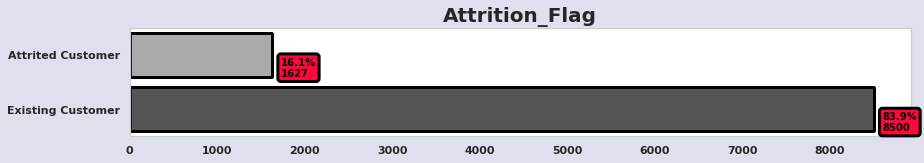

In [ ]:
bar_chart_bar('Attrition_Flag',2)



  *   Our target class `Attrited Customer` is 16% vs `Existing Customer` at 84%
  *   Imbalance in the target class may require Over/Under Sampling





---
> #### **Observations on `Customer_Age`**



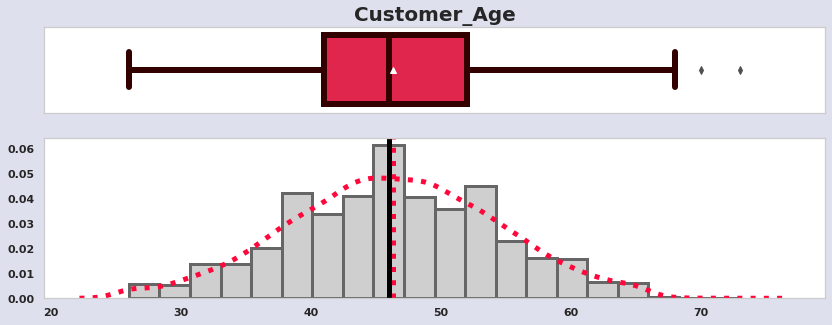

In [ ]:
histogram_boxplot(df['Customer_Age'])

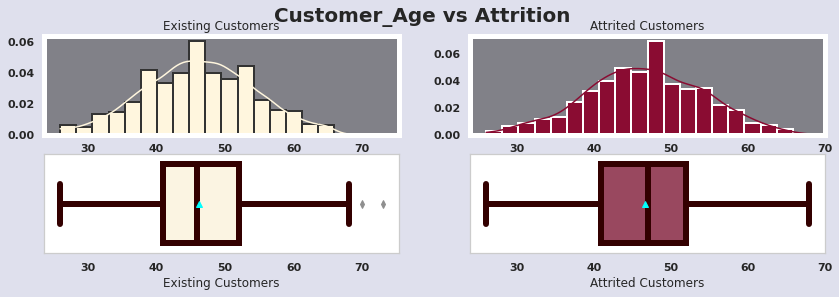

In [ ]:
outlier_detail('Customer_Age');plot('Customer_Age')

In [ ]:
df['Customer_Age'].describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

`Customer Age` has two outliers. These are still within the range of a normal lifespan. The maximum value is 73. There is no indication that this is an error entry. This is a valid representation of the poplution. Therefore, these outliers will not be treated.

- Mean and Median Age is 46
- Distribution for Existing VS Attrited customers is similar



---
> #### **Observations on `Gender`**



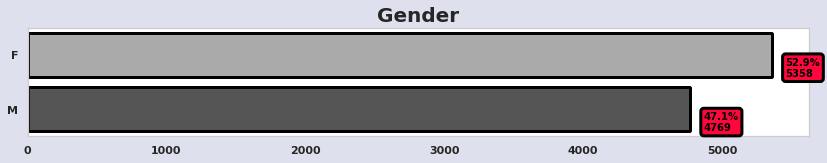

In [ ]:
bar_chart_bar('Gender',2)

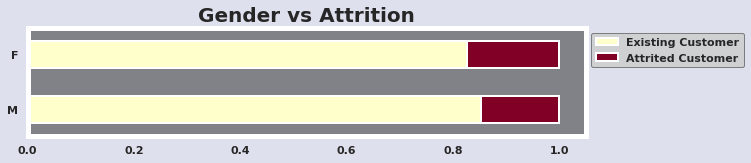

In [ ]:
stacked_plot("Gender",2)

In [ ]:
cat_attr('Gender')

Gender                 F      M
Attrited Customer  17.4%  14.6%
Existing Customer  82.6%  85.4%


- 53% of customers are Female
- 47% of customers are Male
- the percentages of attrition between the genders are similar - but slightly higher for Females



---
> #### **Observations on `Dependent_count`**



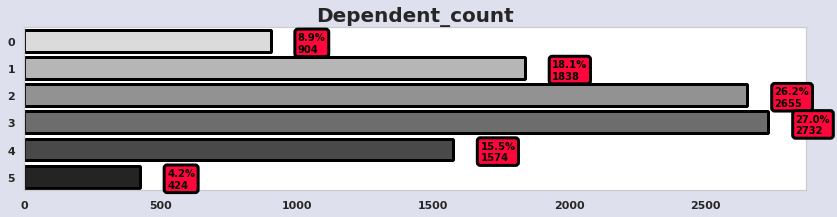

In [ ]:
bar_chart_bar('Dependent_count', 3)

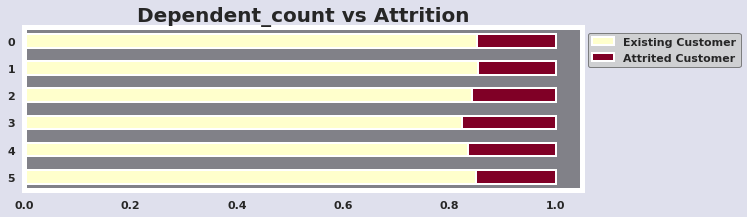

In [ ]:
stacked_plot("Dependent_count",3)

In [ ]:
cat_attr('Dependent_count')

Dependent_count        0      1      2      3      4      5
Attrited Customer  14.9%  14.6%  15.7%  17.6%  16.5%  15.1%
Existing Customer  85.1%  85.4%  84.3%  82.4%  83.5%  84.9%


- 9% of customers have 0 dependents
- 18% of customers have 1 dependent
- 26% of customers have 2 dependents
- 27% of customers have 3 dependents
- 16% of customers have 4 dependents
- 4% of customers have 5 dependents
- the percentages of attrition between the multiple dependent categories are similar. Attritions rates are higher for customers who have 2 or more dependents



---
> #### **Observations on `Education_Level`**



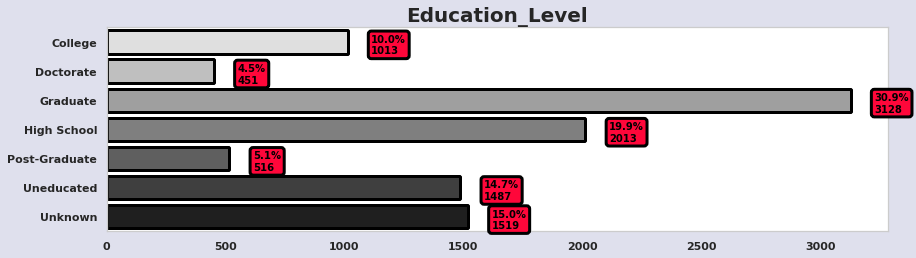

In [ ]:
bar_chart_bar('Education_Level',3.75)

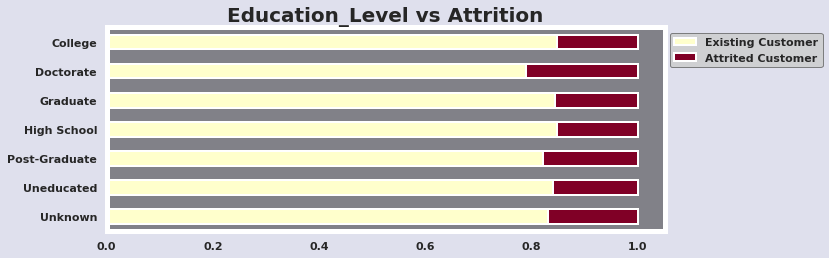

In [ ]:
stacked_plot("Education_Level",3.75)

In [ ]:
cat_attr('Education_Level')

Education_Level   College Doctorate Graduate High School Post-Graduate Uneducated Unknown
Attrited Customer   15.2%     21.1%    15.6%       15.2%         17.8%      15.9%   16.9%
Existing Customer   84.8%     78.9%    84.4%       84.8%         82.2%      84.1%   83.1%


- 10% of customers have College level education
- 4% of customers have Doctorate level education
- 31% of customers have Graduate level education
- 20% of customers have High School level education
- 5% of customers have Post-Graduate level education
- 15% of customers have Uneducated level education
- 15% of customers have Unknown level education
- the percentages of attrition are highest among customers with education level of Doctorate and Post-Graduate



---
> #### **Observations on `Marital_Status`**



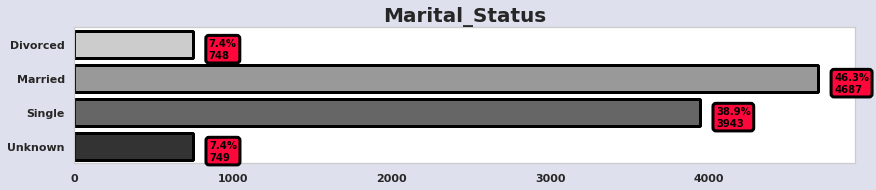

In [ ]:
bar_chart_bar('Marital_Status',2.5)

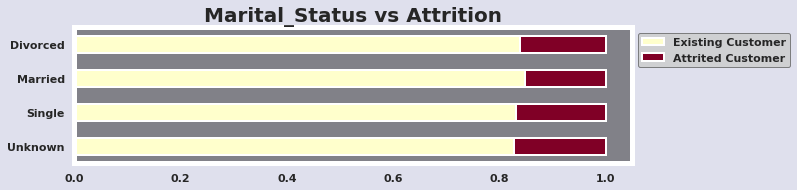

In [ ]:
stacked_plot('Marital_Status',2.5)

In [ ]:
cat_attr('Marital_Status')

Marital_Status    Divorced Married Single Unknown
Attrited Customer    16.2%   15.1%  16.9%   17.2%
Existing Customer    83.8%   84.9%  83.1%   82.8%


- 46% of customers are Married
- 39% of customers are Single
- 7% of customers are Divorced
- 7% of customers have Unknown marital status
- the percentages of attrition are similar between the marriage categories - the "Unknown" category and the Single status both have the highest attrition rates at 17% each



---
> #### **Observations on `Income_Category`**



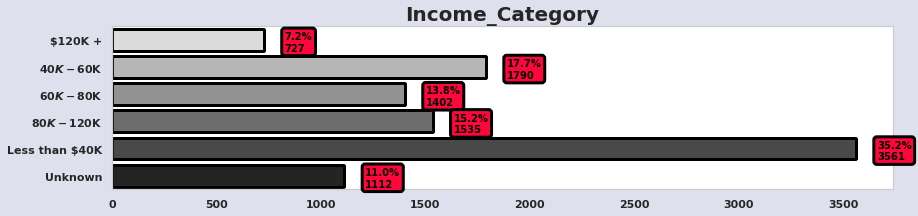

In [ ]:
bar_chart_bar('Income_Category',3)

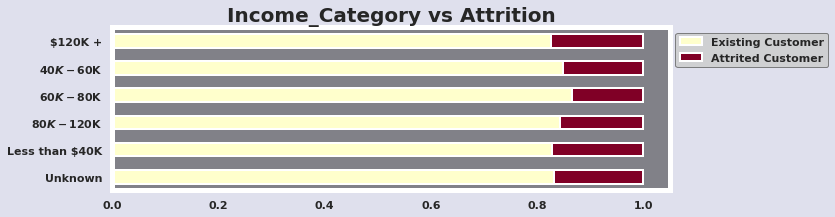

In [ ]:
stacked_plot('Income_Category',3)

In [ ]:
cat_attr('Income_Category')

Income_Category   $120K + $40K - $60K $60K - $80K $80K - $120K Less than $40K Unknown
Attrited Customer   17.3%       15.1%       13.5%        15.8%          17.2%   16.8%
Existing Customer   82.7%       84.9%       86.5%        84.2%          82.8%   83.2%


- 7% of customers have annual income of 120K and over USD
- 18% of customers have annual income of 40K thru 60K USD
- 14% of customers have annual income of 60K thru 80K USD
- 15% of customers have annual income of 80K thru 60K USD
- 35% of customers have annual income of 40K thru 120K USD
- 11% of customers have annual income of Less than 40K USD
- the percentages of attrition are highest among 120K and Over - and Less than 40K with both at 17% attrition. Attrition is highest at both ends of the income spectrum



---
> #### **Observations on `Card_Category`**



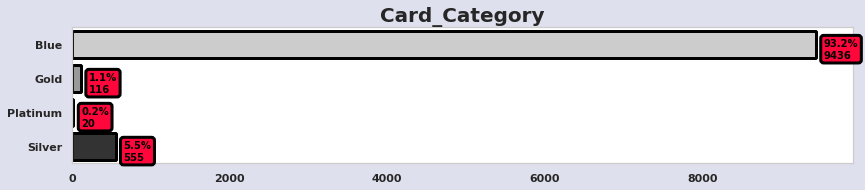

In [ ]:
bar_chart_bar('Card_Category',2.5)

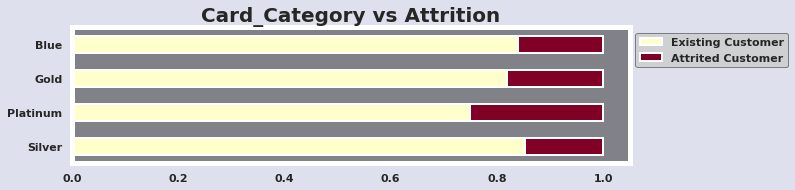

In [ ]:
stacked_plot('Card_Category',2.5)

In [ ]:
cat_attr('Card_Category')

Card_Category       Blue   Gold Platinum Silver
Attrited Customer  16.1%  18.1%    25.0%  14.8%
Existing Customer  83.9%  81.9%    75.0%  85.2%


- 93% of customers have Blue Card
- 1% of customers have Gold Card
- 6% of customers have Silver Card
- Less than 1% of customers have Platinum Card
- Platinum Card has the worst performance with an attritition rate of 25%. It's also notable that Less than 1% of card holders have Platinum Card. Would this be due to Annual Fees? Siver Card has the lowest attrition rate at 15%



---
> #### **Observations on `Months_on_book`**



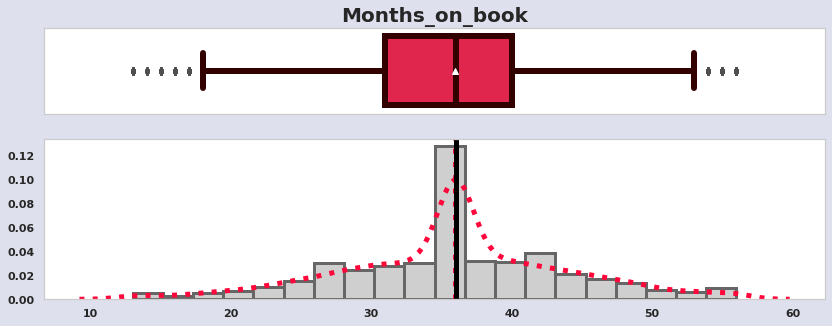

In [ ]:
histogram_boxplot(df['Months_on_book'])

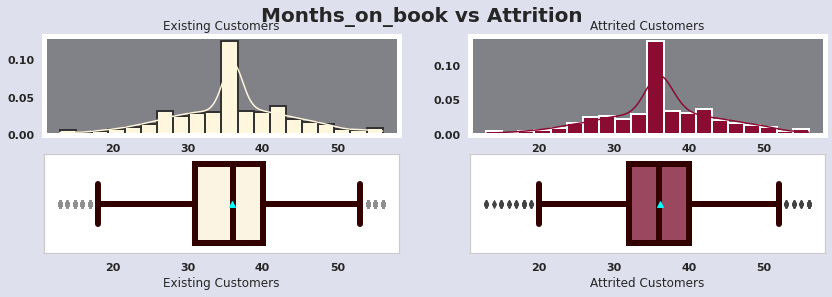

In [ ]:
outlier_detail('Months_on_book');plot('Months_on_book')

`Months_on_book` has quite a few outliers both below floor and above cap. However, these do not appear to be errors. These appear to be a valid representation of the population. Therefore, these outliers will not be treated.
- The distribution is normal



---
> #### **Observations on `Total_Relationship_Count`**



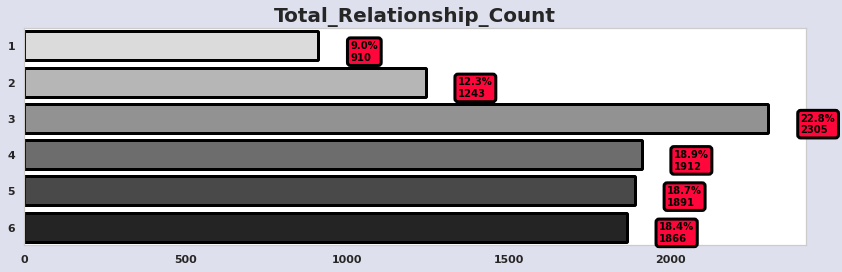

In [ ]:
bar_chart_bar('Total_Relationship_Count',4)

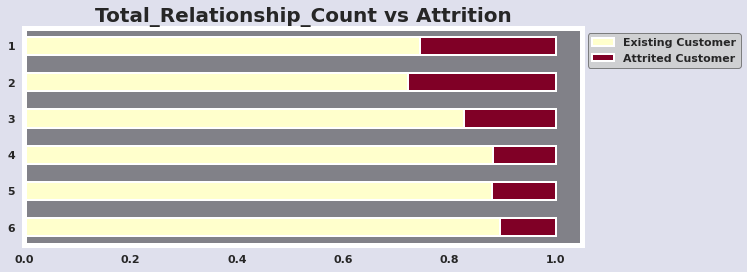

In [ ]:
stacked_plot('Total_Relationship_Count',4)

In [ ]:
cat_attr('Total_Relationship_Count')

Total_Relationship_Count      1      2      3      4      5      6
Attrited Customer         25.6%  27.8%  17.4%  11.8%  12.0%  10.5%
Existing Customer         74.4%  72.2%  82.6%  88.2%  88.0%  89.5%


Total_Relationship_Count: Total no. of products held by the customer

- 9% of customers hold 1 product
- 12% of customers hold 2 products
- 23% of customers hold 3 products
- 19% of customers hold 4 products
- 19% of customers hold 5 products
- 18% of customers hold 6 products
- Customers holding 1 or 2 products have the highest rate of attrition at 28% for 2 products and 26% for 1 product.



---
> #### **Observations on `Months_Inactive_12_mon`**



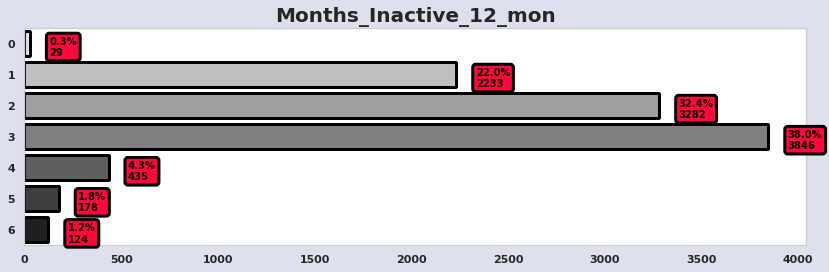

In [ ]:
bar_chart_bar('Months_Inactive_12_mon',4)

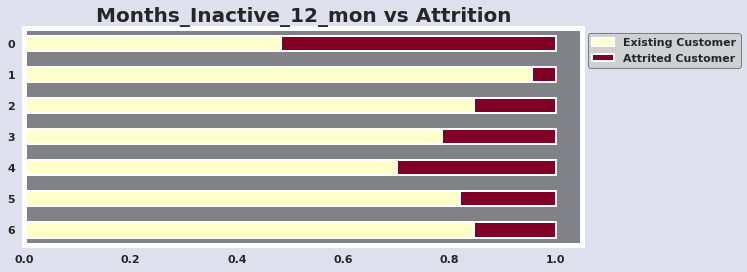

In [ ]:
stacked_plot('Months_Inactive_12_mon',4)

In [ ]:
cat_attr('Months_Inactive_12_mon')

Months_Inactive_12_mon      0      1      2      3      4      5      6
Attrited Customer       51.7%   4.5%  15.4%  21.5%  29.9%  18.0%  15.3%
Existing Customer       48.3%  95.5%  84.6%  78.5%  70.1%  82.0%  84.7%


- Less than 1% of customers have been inactive for 0 months
- 22% of customers have been inactive for 1 month
- 32% of customers have been inactive for 2 months
- 38% of customers have been inactive for 3 months
- 4% of customers have been inactive for 4 months
- 2% of customers have been inactive for 5 months
- 1% of customers have been inactive for 6 months
- Attrition rate is highest (52%) for customers having been inactive for 0 months. 4 months of inactivity has an attrition rate at 30%



---
> #### **Observations on `Contacts_Count_12_mon`**



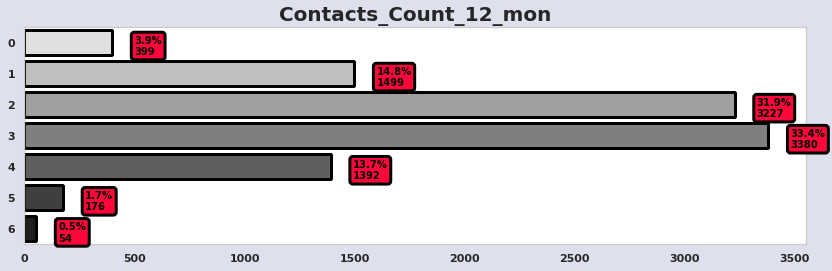

In [ ]:
bar_chart_bar('Contacts_Count_12_mon',4)

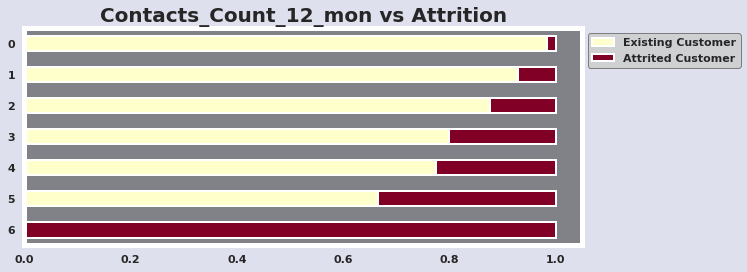

In [ ]:
stacked_plot('Contacts_Count_12_mon',4)

In [ ]:
cat_attr('Contacts_Count_12_mon')

Contacts_Count_12_mon      0      1      2      3      4      5       6
Attrited Customer       1.8%   7.2%  12.5%  20.1%  22.6%  33.5%  100.0%
Existing Customer      98.2%  92.8%  87.5%  79.9%  77.4%  66.5%    0.0%


Contacts_Count_12_mon: No. of Contacts in the last 12 months

- 4% of customers have had 0 contacts in the last 12 months
- 15% of customers have had 1 contact in the last 12 month
- 32% of customers have had 2 contacts in the last 12 months
- 33% of customers have had 3 contacts in the last 12 months
- 14% of customers have had 4 contacts in the last 12 months
- 2% of customers have had 5 contacts in the last 12 months
- Less than 1% of customers have had 6 contacts in the last 12 months
- Attrition rate is 100% for customers with 6 contacts. There is a clear linear relationship with number of contacts and attrition. The greater number of contacts, the greater the attrition.



---
> #### **Observations on `Credit_Limit`**



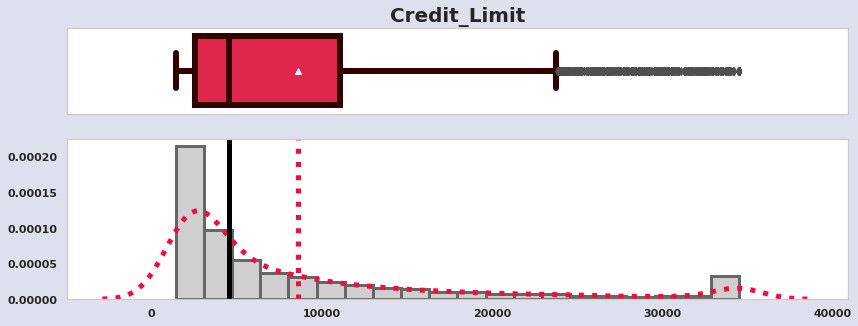

In [ ]:
histogram_boxplot(df['Credit_Limit'])

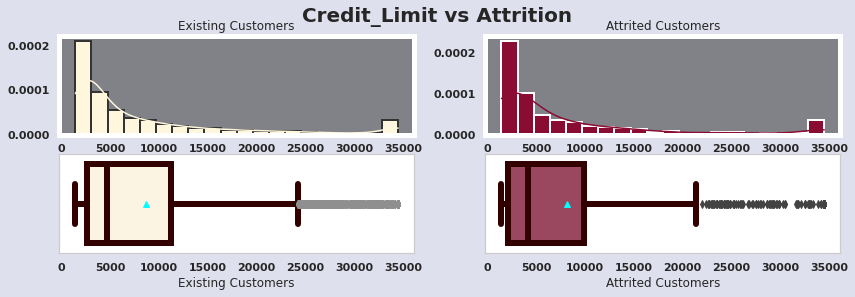

In [ ]:
outlier_detail('Credit_Limit');plot('Credit_Limit')

`Credit_Limit` has quite a few outliers above cap with a significant right skew. However, these do not appear to be errors. These appear to be a valid representation of the population. Therefore, these outliers will not be treated.
- The distribution is similar between existing and attrited customers



---
> #### **Observations on `Total_Revolving_Bal`**



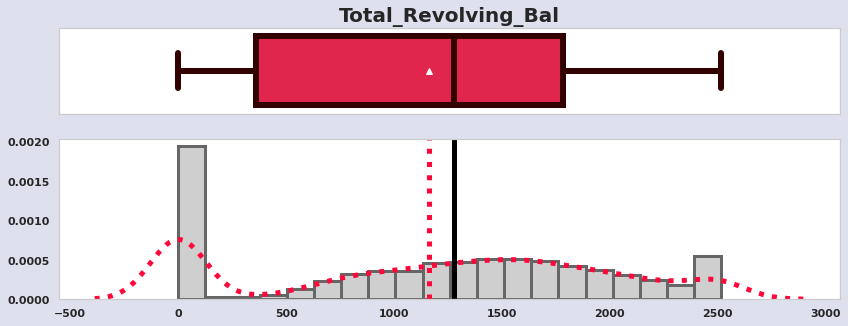

In [ ]:
histogram_boxplot(df['Total_Revolving_Bal'])

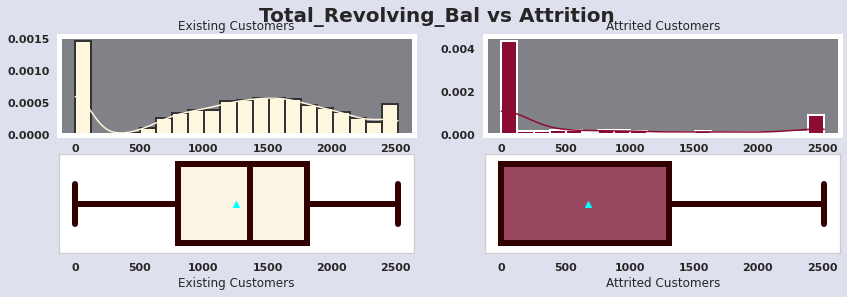

In [ ]:
outlier_detail('Total_Revolving_Bal');plot('Total_Revolving_Bal')

`Total_Revolving_Bal` has majority at 0. We may apply binning techniques to this feature.
- Attrited customers have more right skew



---
> #### **Observations on `Avg_Open_To_Buy`**



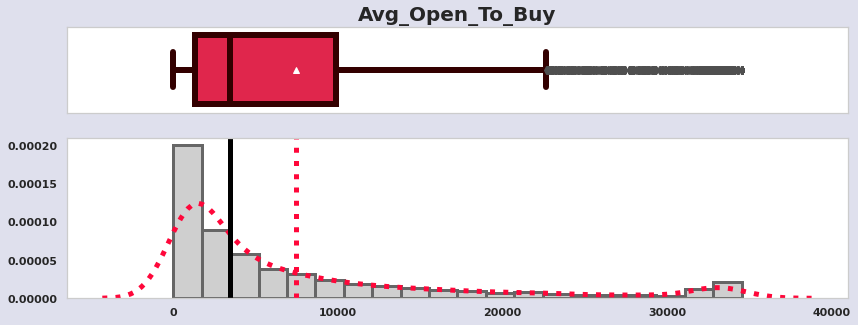

In [ ]:
histogram_boxplot(df['Avg_Open_To_Buy'])

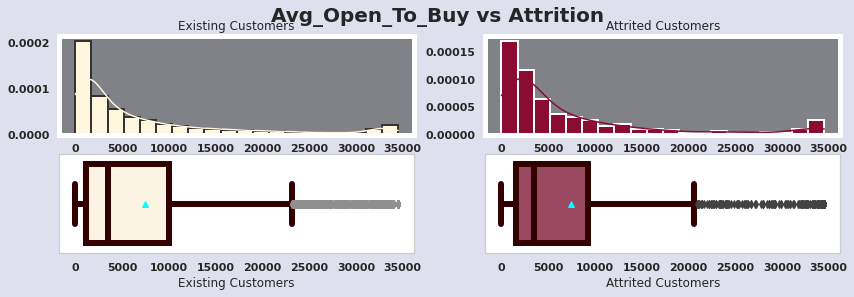

In [ ]:
outlier_detail('Avg_Open_To_Buy');plot('Avg_Open_To_Buy')

`Avg_Open_To_Buy` has quite a few outliers above cap with a significant right skew. However, these do not appear to be errors. These appear to be a valid representation of the population. Therefore, these outliers will not be treated.



---
> #### **Observations on `Total_Amt_Chng_Q4_Q1`**



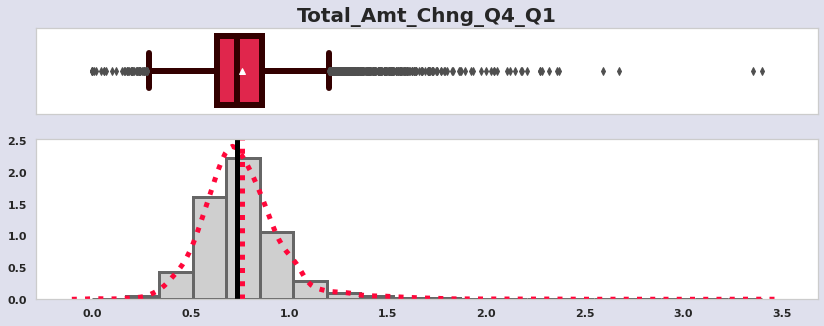

In [ ]:
histogram_boxplot(df['Total_Amt_Chng_Q4_Q1'])

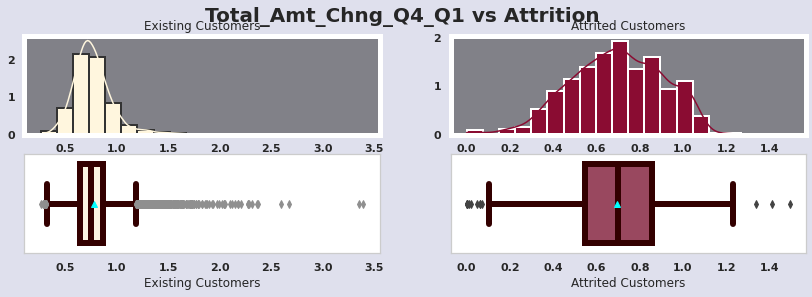

In [ ]:
outlier_detail('Total_Amt_Chng_Q4_Q1');plot('Total_Amt_Chng_Q4_Q1')

`Total_Amt_Chng_Q4_Q1` has quite a few outliers both below and above cap with a moderate right skew. However, these do not appear to be errors. These appear to be a valid representation of the population. Therefore, these outliers will not be treated.



---
> #### **Observations on `Total_Trans_Amt`**



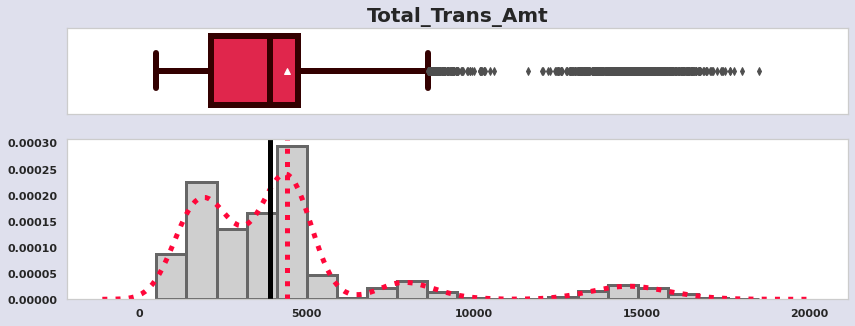

In [ ]:
histogram_boxplot(df['Total_Trans_Amt'])

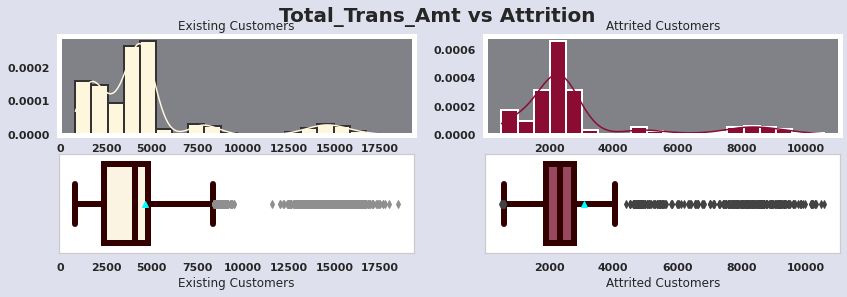

In [ ]:
outlier_detail('Total_Trans_Amt');plot('Total_Trans_Amt')

`Total_Trans_Amt` has quite a few outliers above cap with a right skew. These do not appear to be errors. These appear to be a valid representation of the population. Therefore, these outliers will not be treated.
- We'll consider binning techniques for this feature



---
> #### **Observations on `Total_Trans_Ct`**



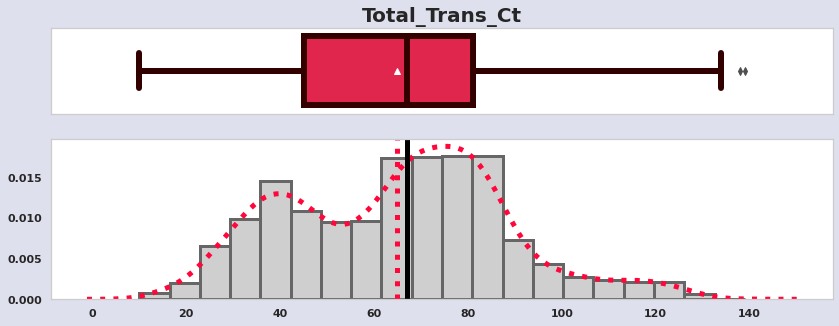

In [ ]:
histogram_boxplot(df['Total_Trans_Ct'])

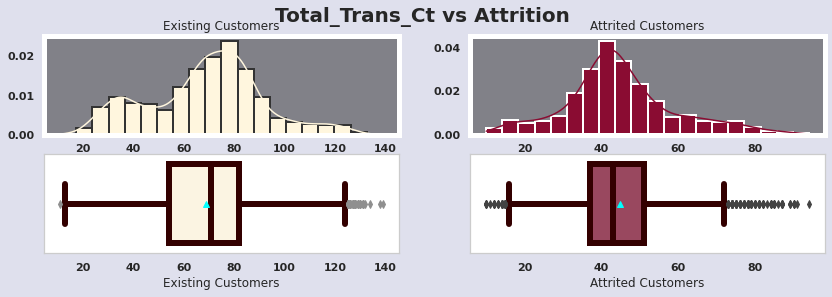

In [ ]:
outlier_detail('Total_Trans_Ct');plot('Total_Trans_Ct')

`Total_Trans_Ct` has two lonely outliers above cap. These do not appear to be errors. These appear to be a valid representation of the population. Therefore, these outliers will not be treated.
- For existing customers, the mean is slightly below medium. For attrited customers, the mean is slightly above median



---
> #### **Observations on `Total_Ct_Chng_Q4_Q1`**



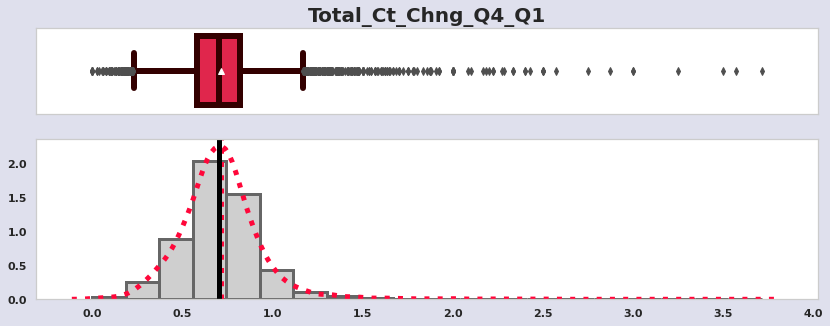

In [ ]:
histogram_boxplot(df['Total_Ct_Chng_Q4_Q1'])

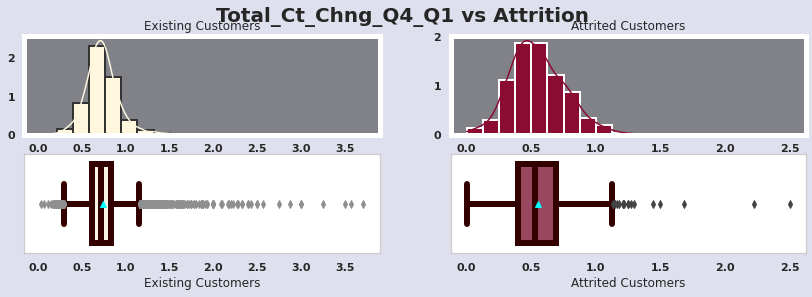

In [ ]:
outlier_detail('Total_Ct_Chng_Q4_Q1');plot('Total_Ct_Chng_Q4_Q1')

`Total_Ct_Chng_Q4_Q1` has quite a few outliers both below floor and above cap with a moderate right skew. However, these do not appear to be errors. These appear to be a valid representation of the population. Therefore, these outliers will not be treated.



---
> #### **Observations on `Avg_Utilization_Ratio`**



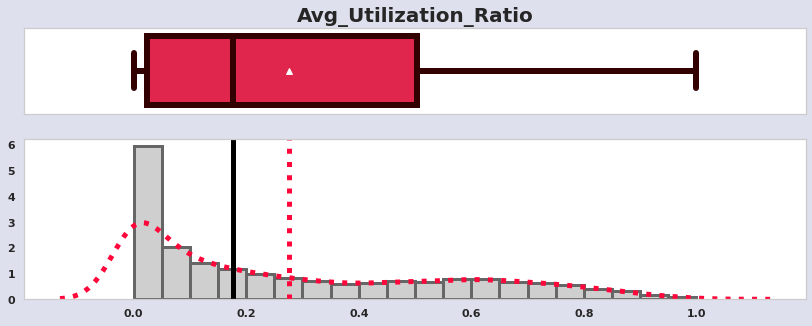

In [ ]:
histogram_boxplot(df['Avg_Utilization_Ratio'])

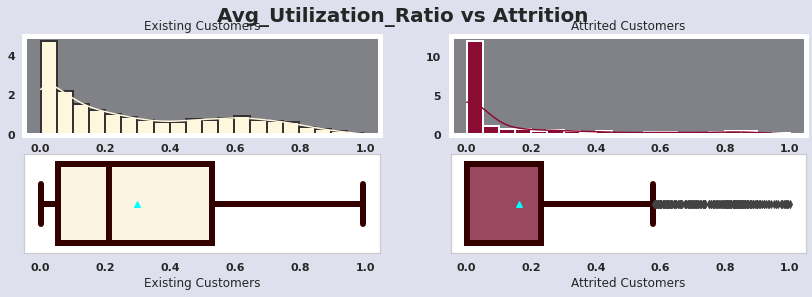

In [ ]:
plot('Avg_Utilization_Ratio')

`Avg_Utilization_Ratio` has quite a few outliers both below floor and above cap with a moderate right skew. However, these do not appear to be errors. These appear to be a valid representation of the population. Therefore, these outliers will not be treated.



> 



In [ ]:
pair_cont = df[['Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Attrition_Flag']]


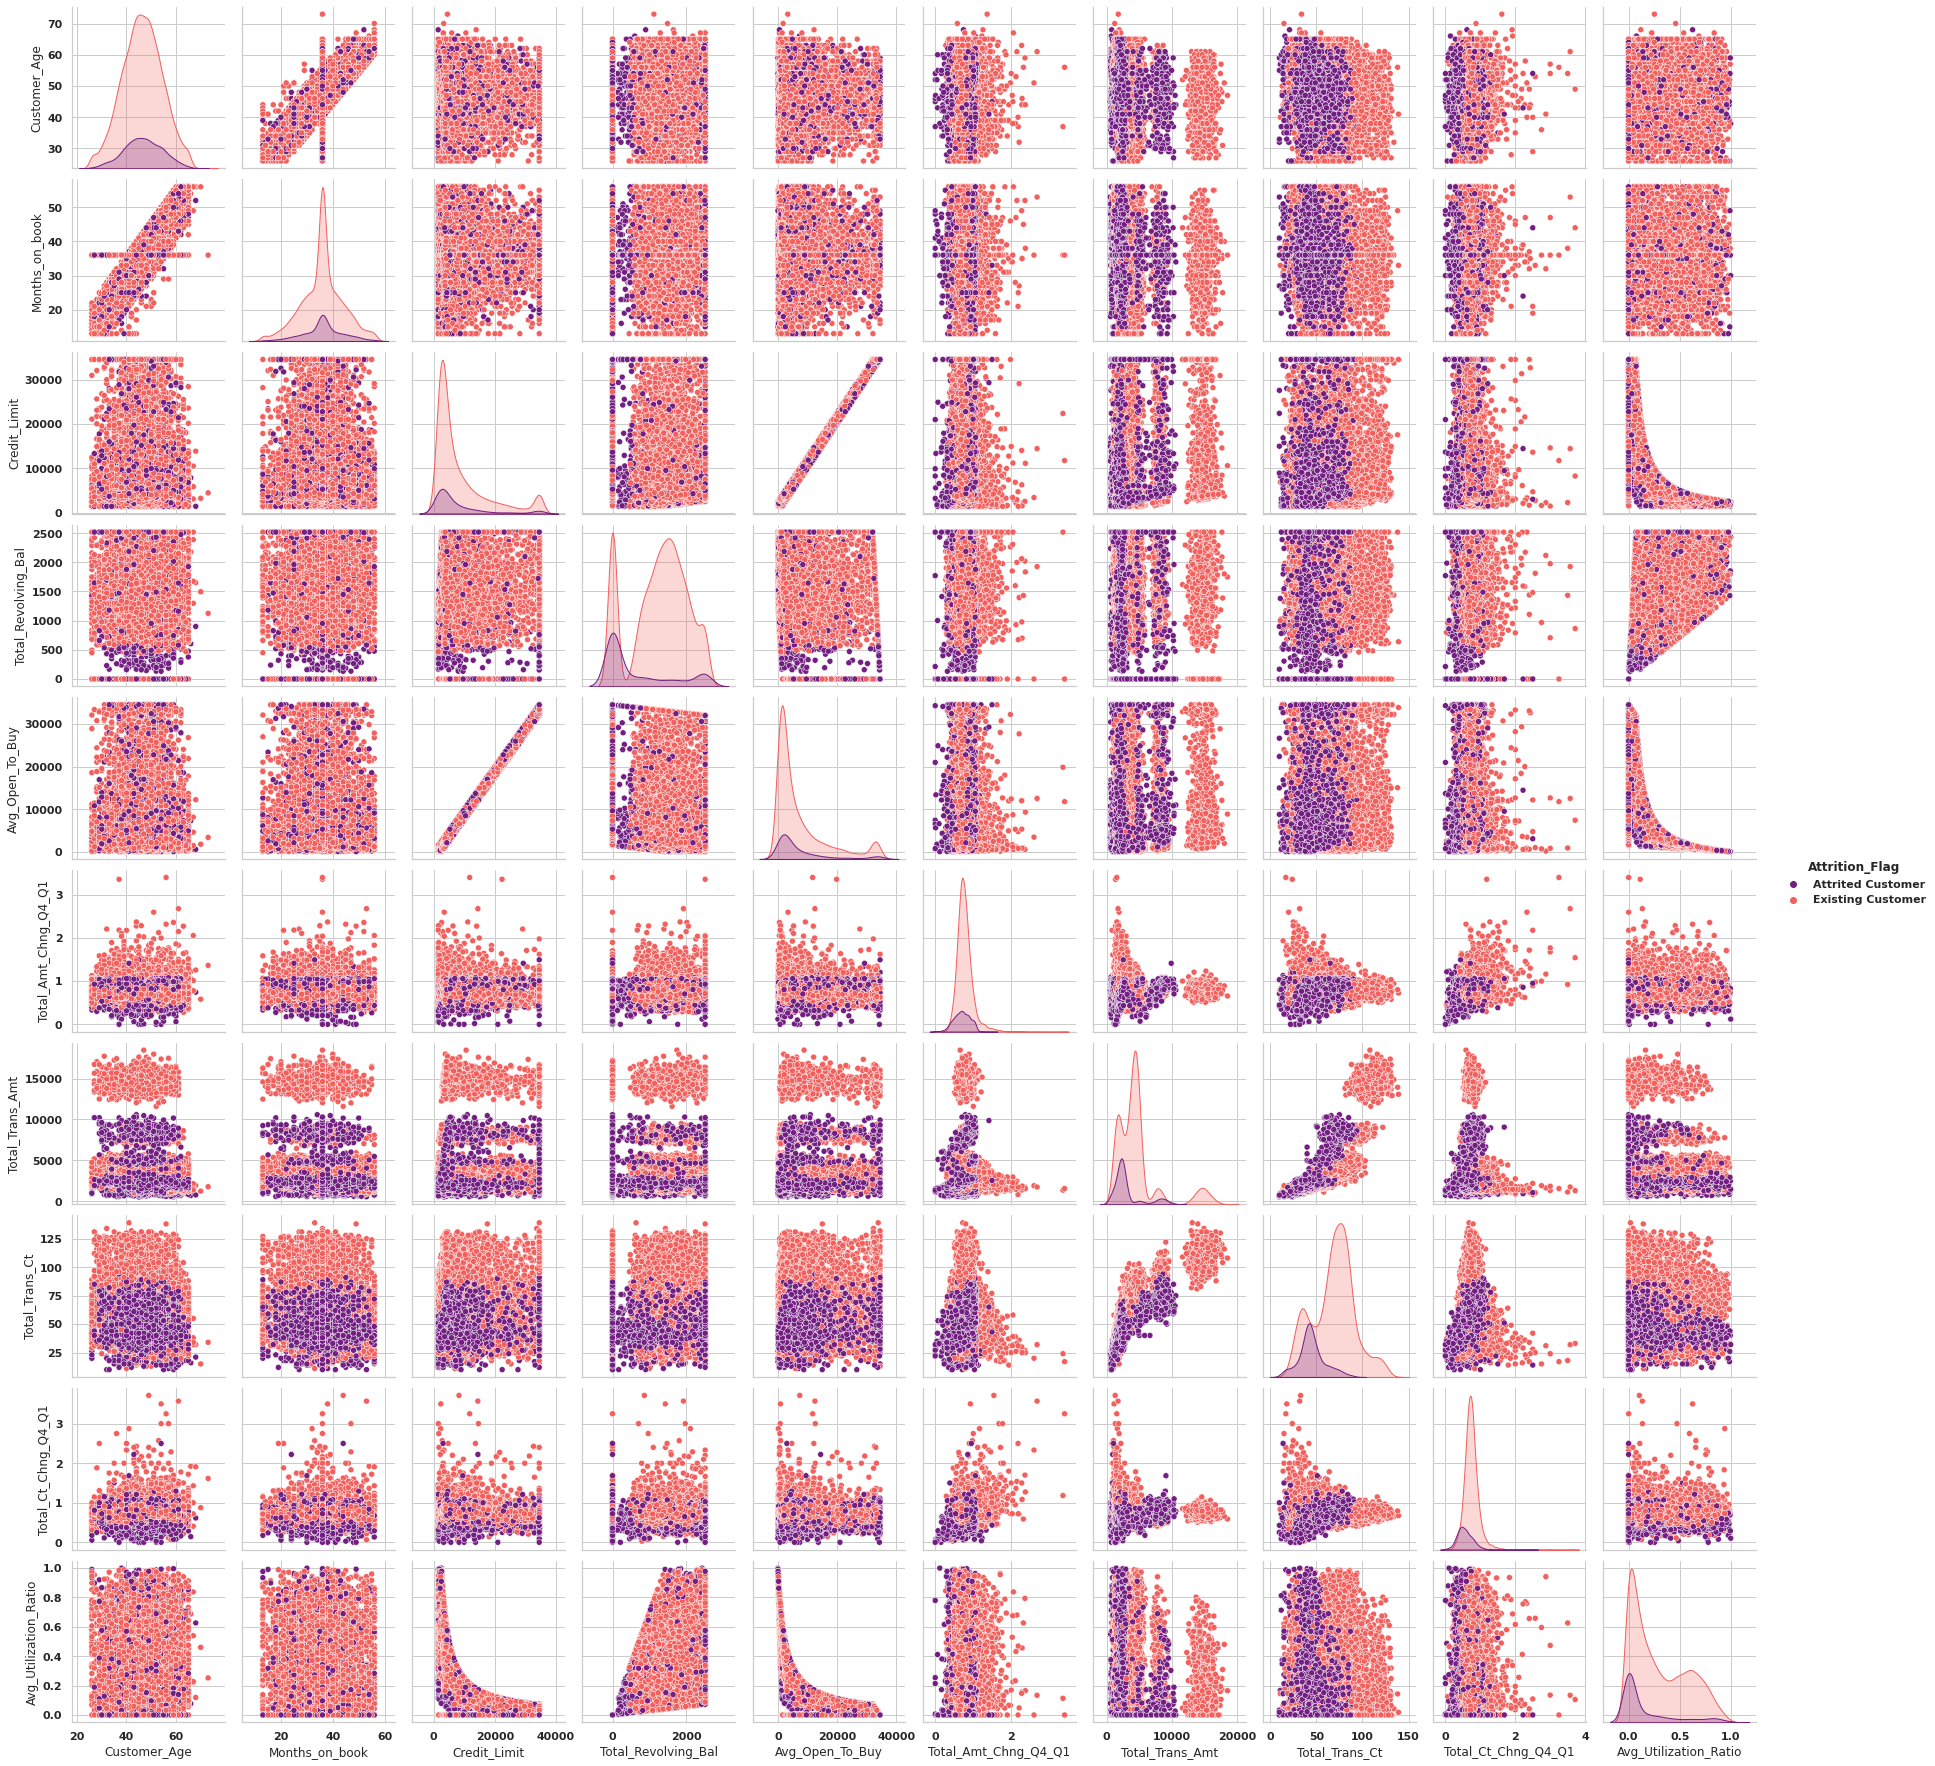

In [ ]:
sns.pairplot(data=pair_cont, hue='Attrition_Flag', palette='magma')

    - Pairplot shows strong linear correlation between Credit_Limit and Avg_Open_To_Buy
    - Customer_Age and Months_On_book have a strong linear relationship as well as a line in the center. More research is needed to undertand this
    - Total_Trans_Amt and Total_Trans_Ct have a positive linear correlation
    - The hue contrast for Attrition shows clustering a separation between attrited and existing customers for many features
    - Other patterns are seen that suggest non-linear correlations are prevalent

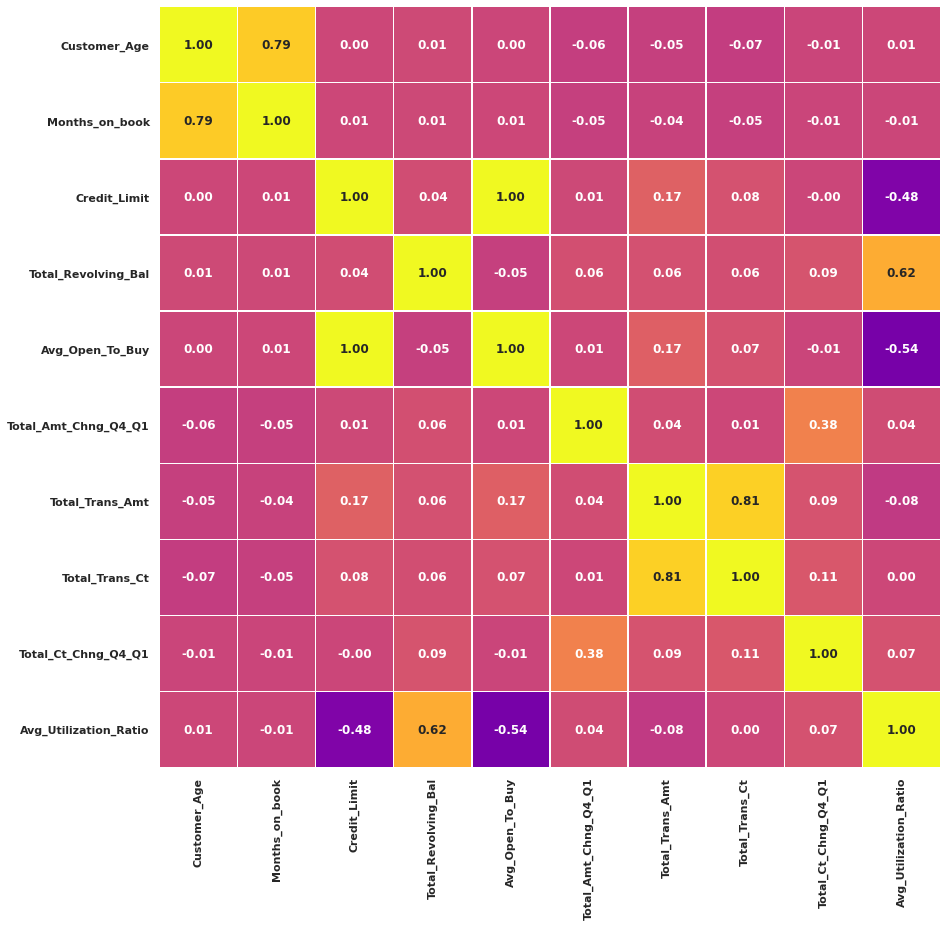

In [ ]:
sns.set(rc={"figure.figsize": (14, 14)})
sns.heatmap(pair_cont.corr(),annot=True,linewidths=0.5,center=0,cbar=False,cmap="plasma",fmt="0.2f")
plt.show()

    - The heatmap confirms our findings from the pairplot

## **Data Preparation**

In [ ]:
#make a copy of the DataFrame before prep just in case we make a mistake and need to come back to this
#df_copy = df.copy()
#df = df_copy.copy()



> ### **Outlier Treatment**



`Customer Age` has two outliers. These are still within the range of a normal lifespan. The maximum value is 73. There is no indication that this is an error entry. This is a valid representation of the poplution. **Therefore, these outliers will not be treated.**

`Months_on_book` has quite a few outliers both below floor and above cap. However, these do not appear to be errors. These appear to be a valid representation of the population. **Therefore, these outliers will not be treated.**

`Credit_Limit` has quite a few outliers above cap with a significant right skew. However, these do not appear to be errors. These appear to be a valid representation of the population. **Therefore, these outliers will not be treated.**

`Avg_Open_To_Buy` has quite a few outliers above cap with a significant right skew. However, these do not appear to be errors. These appear to be a valid representation of the population. **Therefore, these outliers will not be treated.**

`Total_Amt_Chng_Q4_Q1` has quite a few outliers both below floor and above cap with a moderate right skew. However, these do not appear to be errors. These appear to be a valid representation of the population. **Therefore, these outliers will not be treated.**

`Total_Trans_Amt` has quite a few outliers above cap with a right skew. These do not appear to be errors. These appear to be a valid representation of the population. **Therefore, these outliers will not be treated.**

`Total_Trans_Ct` has two lonely outliers above cap. These do not appear to be errors. These appear to be a valid representation of the population. **Therefore, these outliers will not be treated.**

`Total_Ct_Chng_Q4_Q1` has quite a few outliers both below floor and above cap with a moderate right skew. However, these do not appear to be errors. These appear to be a valid representation of the population. Therefore, these outliers will not be treated.




> ### **Missing Value Treatment**



There are no missing values to impute



> ### **Scaling**



Standard Scaler will be implemented within the pipeline function. Training set scaling will occur seperately from Test set scaling in order to avoid data leakage. (see next section) 



>  ### **Column Drops**



Dropping highly correlated Features
  - Our Exploratory Data Analysis showed that `Avg_Open_To_Buy` and `Credit Limit` were highly correlated.
  - Let's confirm 

In [ ]:
# I found this handy snippet of code to use as a sanity check for high correlation on https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
corr_matrix = df.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['Avg_Open_To_Buy']

This confirms our finding during Exploratory Data Analysis

In [ ]:
print("Before dropping 'Avg_Open_To_Buy'")
print(df.shape[1])
df = df.drop('Avg_Open_To_Buy', axis=1)
print()
print("After dropping 'Avg_Open_To_Buy'")
print(df.shape[1])

Before dropping 'Avg_Open_To_Buy'
20

After dropping 'Avg_Open_To_Buy'
19




> ### **Unknown Values**





- In the Exploratory Data Analysis, we found that 3 features contain "Unkown"
      
      - Education_Level has 1,519 "Unknowns" (15% of the Feature)
      - Marital_Status has 749 "Unknowns" (7.4% of the Feature)
      - Income_Category has 1,112 "Unknowns" (11% of the Feature)

Let's find out how many records are affected by "Unknowns"

In [ ]:
print(df[df.isin(['Unknown']).any(axis=1)].value_counts().sum())
print (str((df[df.isin(['Unknown']).any(axis=1)].value_counts().sum() / df.shape[0] * 100).round()) + '%')

3046
30.0%


- 30% of records have a feature with value "Unknown". We don't want to drop 30% of our data. Additionally, "Unknown" could have some predictive relevance

- Instead of droping 3,046 rows (30% of our data), we could drop only rows that have "Unknown" as a value in all three features.

In [ ]:
# create dataframe that only contains the three features with "Unknown"
unknowns = df[["Marital_Status", "Education_Level", "Income_Category"]]

In [ ]:
# find rows where each column value is Unknown
unknowns[unknowns.apply(lambda x: min(x) == max(x), 1)]

Marital_Status Education_Level Income_Category
1374        Unknown         Unknown         Unknown
1456        Unknown         Unknown         Unknown
2928        Unknown         Unknown         Unknown
3207        Unknown         Unknown         Unknown
6721        Unknown         Unknown         Unknown
7544        Unknown         Unknown         Unknown
9893        Unknown         Unknown         Unknown

There are 7 records with all values as "Unknown". In my earlier production versions of this notebook, I removed those from the main dataframe using drop by index. However, model performance was not improved - so I will not be doing that in this final version.



> ### **Binning**



Both `Total_Revolving_Bal` and `Total_Trans_Amt` are candidates for Binning due to the uneven distribution and, in the case of `Total_Revolving_Bal`, the high frequency of values at "0". In older versions of this notebook, I tried multiple binning combinations. There was no significant improvement in the model scores. In fact, the variance between Type 1 and Type 2 errors was higher when I used binning techniques. Additonally, I worry that other popular binning techniques based on the distribution could also potentially create a data leak. As a result, no binning techniques will be used.



> ### **Other Considerations**



`Months_Inactive_12_mon` where months equals 0 - In older versions of this notebook, I dropped these because Attrition vs Existing for 0 months was almost equal. However, model performance was not improved - so I will not be doing that in this final version.

`Contacts_Count_12_mon`: I dropped this feature in earlier versions of this notebook due to the direct linear correlation with Attrition. However, model performance was not improved - so I will not be doing that in this final version.

In older versions of this notebook, feature_importances showed columns with no correlation. I dropped these columns, but model performance declined. Therefore, those will not be dropped in this version.



> ### **Split the Data**



In [ ]:
# our Target Variable is categorical by default. Manually encoding  to numerical values here
aflag = {'Existing Customer':0,'Attrited Customer':1}
df['Attrition_Flag'] = df['Attrition_Flag'].map(aflag)

In [ ]:
df['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
# Separating target variable from the independent variables
X = df.drop(columns="Attrition_Flag")
y = df["Attrition_Flag"]

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8,stratify=y)
print(X_train.shape, X_test.shape)

(7088, 18) (3039, 18)


- There are some categorical features that imply order. These could be encoded as numerical values to represent the ordinal relationships between the values within the feature. However, I'm getting better results with one hot encoding

In [ ]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 31) (3039, 31)


## **Model Building**

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will leave credit card services BUT the customer doesn't leave - Loss of resources
2. Predicting a customer will NOT leave credit card services BUT the customer does leave - Loss of opportunity

#### Which case is more important? 
* Predicting that a customer will NOT leave credit card services BUT the customer does leave i.e. losing on a potential source of income for the company because that customer will not be targeted by the customer support team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Thera Bank wants `Recall` to be maximized, greater the Recall, the lesser the chances of false negatives.

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    FOR CLASSIFICATION MODELS

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [ ]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    FOR CLASSIFICATION MODELS
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='',cmap='CMRmap')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Let's find the cross validation means for the algorithms we will be using out of the box.**

In [ ]:
models = []  

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "BAG",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("bagging_classifier", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 10
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))




LR: 58.2914143766496
DTREE: 79.71821145784816
RF: 78.13848781245147
BAG: 81.56342182890855
XGB: 83.84567613724577
ADB: 82.87998757956838
GBM: 83.93184288154015


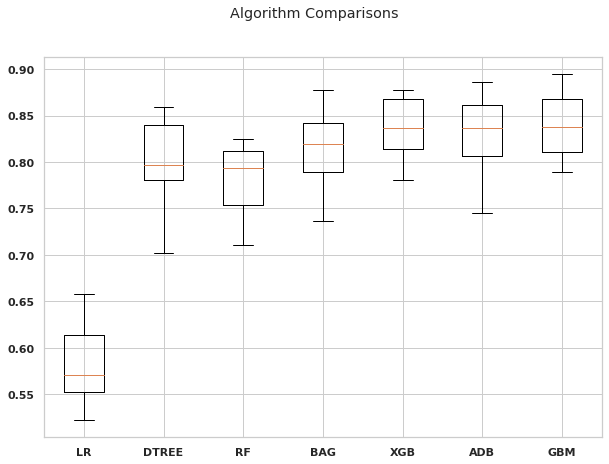

In [ ]:
# Plot the boxplots for the CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparisons")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

    These scores need to be improved and performance variance needs to be reduced



> ### **UP & DOWN SAMPLING**



Our dataset is imbalanced. Our target class only represents 16% of the dataset. This could lead to an increase in Type 2 errors (False Negatives)
To solve the problem, we may use one of the following:
- use SMOTE to over sample the minority class by creating synthetic elements for the minority class
- use Cluster Centroid based under sampling by replacing a cluster of
majority samples by the cluster centroid of a KMeans algorithm.

In [ ]:
y.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

Create the SMOTE and Cluster Centroid versions of the dataset. We might use these later if performance in any of the algorithms favors False Negatives. We'll do that by appending either `_over` or `_under` to the dataset name when fitting to the model.

In [ ]:
display(HTML('''<hr/>'''))
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

display(HTML('''<hr/>'''))

print("Before DownSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before DownSampling, counts of label 'No': {} \n".format(sum(y_train==0)))


cc = ClusterCentroids(random_state=4)
X_train_under, y_train_under = cc.fit_sample(X_train, y_train)


print("After DownSampling, counts of label 'Yes': {}".format(sum(y_train_under==1)))
print("After DownSampling, counts of label 'No': {} \n".format(sum(y_train_under==0)))


print('After DownSampling, the shape of train_X: {}'.format(X_train_under.shape))
print('After DownSampling, the shape of train_y: {} \n'.format(y_train_under.shape))

display(HTML('''<hr/>'''))

Before UpSampling, counts of label 'Yes': 1139
Before UpSampling, counts of label 'No': 5949 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 31)
After UpSampling, the shape of train_y: (11898,) 



Before DownSampling, counts of label 'Yes': 1139
Before DownSampling, counts of label 'No': 5949 

After DownSampling, counts of label 'Yes': 1139
After DownSampling, counts of label 'No': 1139 

After DownSampling, the shape of train_X: (2278, 31)
After DownSampling, the shape of train_y: (2278,) 



Models below include default parameters and hyperparameter tuning with GridSearch and Randomized Search. When UpSampling or DownSampling produced better results during the development stage of this notebook - that version of the dataset has been fitted to the model. For detailed comments, see the 'Model Performance' section at the end of this notebook.



> ### **LOGISTIC REGRESSION**



In [ ]:
lr = LogisticRegression(random_state=1)
# Fit the model on training data
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy on training set :  0.8768340857787811
Accuracy on test set :  0.8690358670615334
Recall on training set :  0.43371378402107114
Recall on test set :  0.42213114754098363
Precision on training set :  0.6842105263157895
Precision on test set :  0.639751552795031
None


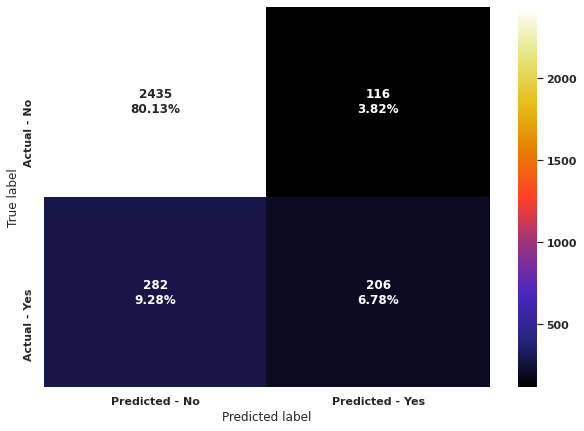

In [ ]:
# Calculating metrics
get_metrics_score(lr)

# Creating confusion matrix
print(make_confusion_matrix(lr, y_test))



> ***Logistic Regression with Up Sampling***



In [ ]:
lr_over = LogisticRegression(random_state=1)
# Fit the model on training data
lr_over.fit(X_train_over, y_train_over)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy on training set :  0.7988148984198645
Accuracy on test set :  0.7953274103323462
Recall on training set :  0.820017559262511
Recall on test set :  0.8217213114754098
Precision on training set :  0.4334106728538283
Precision on test set :  0.4284188034188034


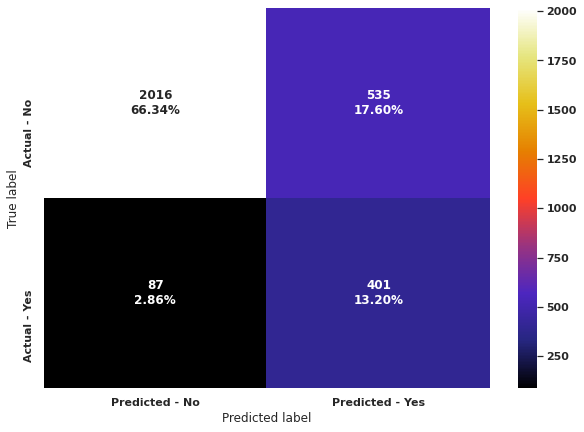

In [ ]:
# Calculating metrics
get_metrics_score(lr_over)

# Creating confusion matrix
make_confusion_matrix(lr_over, y_test)



> ***Logistic Regression with Down Sampling***



In [ ]:
lr_under = LogisticRegression(random_state=1)
# Fit the model on training data
lr_under.fit(X_train_under, y_train_under)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy on training set :  0.7998024830699775
Accuracy on test set :  0.7821651859164199
Recall on training set :  0.839332748024583
Recall on test set :  0.8647540983606558
Precision on training set :  0.43613138686131386
Precision on test set :  0.41453831041257366


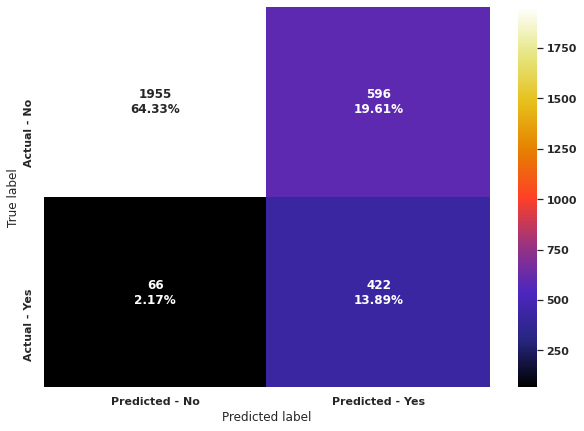

In [ ]:
# Calculating metrics
get_metrics_score(lr_under)

# Creating confusion matrix
make_confusion_matrix(lr_under, y_test)



>  ### **DECISION TREE**



In [ ]:
dt = DecisionTreeClassifier(random_state=1)

# Fit the model on training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Accuracy on training set :  1.0
Accuracy on test set :  0.9427443237907206
Recall on training set :  1.0
Recall on test set :  0.819672131147541
Precision on training set :  1.0
Precision on test set :  0.823045267489712


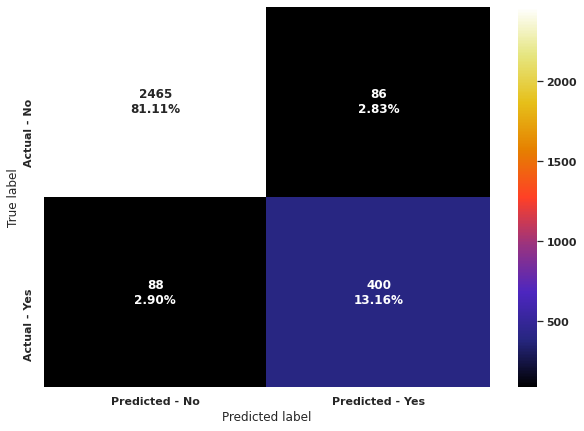

In [ ]:
# Calculating different metrics
get_metrics_score(dt)

# Creating confusion matrix
make_confusion_matrix(dt, y_test)



>  ### **RANDOM FOREST**


In [ ]:
rf = RandomForestClassifier(random_state=1)

# Fit the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Accuracy on training set :  1.0
Accuracy on test set :  0.9542612701546561
Recall on training set :  1.0
Recall on test set :  0.7930327868852459
Precision on training set :  1.0
Precision on test set :  0.9105882352941177


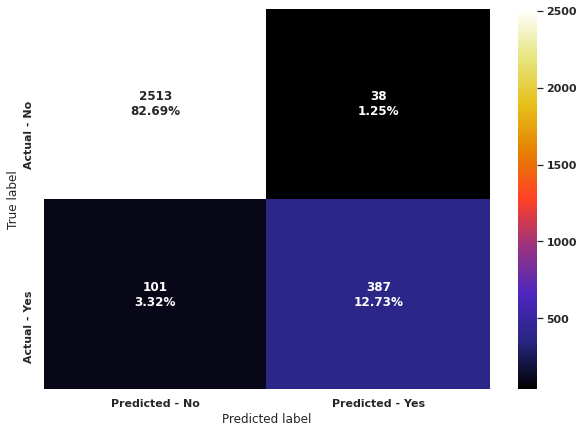

In [ ]:
# Calculating different metrics
get_metrics_score(rf)

# Creating confusion matrix
make_confusion_matrix(rf, y_test)



>   ### **BAGGING CLASSIFIER**



In [ ]:
bc = BaggingClassifier(random_state=1)

# Fit the model on training data
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

Accuracy on training set :  0.9966139954853274
Accuracy on test set :  0.953932214544258
Recall on training set :  0.9815627743634767
Recall on test set :  0.7991803278688525
Precision on training set :  0.9973238180196253
Precision on test set :  0.9027777777777778


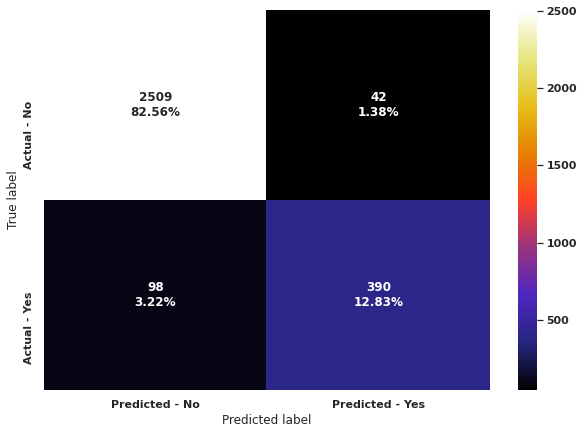

In [ ]:
# Calculating different metrics
get_metrics_score(bc)

# Creating confusion matrix
make_confusion_matrix(bc, y_test)



>  ### **XG BOOST**



In [ ]:
 xg = XGBClassifier(random_state=1,eval_metric='logloss')
 xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Accuracy on training set :  0.9746049661399548
Accuracy on test set :  0.9598552155314248
Recall on training set :  0.8770851624231782
Recall on test set :  0.8463114754098361
Precision on training set :  0.9615014436958614
Precision on test set :  0.8978260869565218


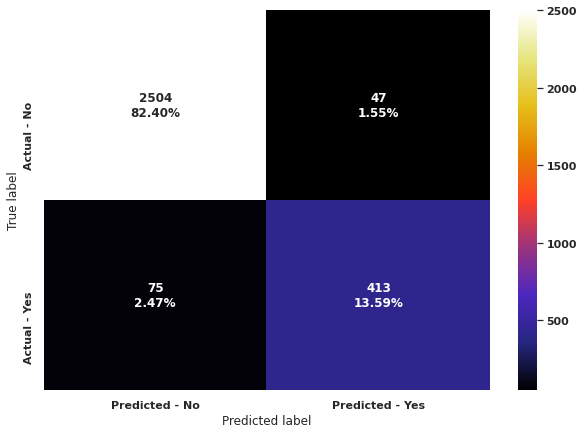

In [ ]:
# Calculating different metrics
get_metrics_score(xg)

# Creating confusion matrix
make_confusion_matrix(xg, y_test)



> ### **ADA BOOST**



In [ ]:
ab = AdaBoostClassifier(random_state=1)
ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

Accuracy on training set :  0.9637415349887133
Accuracy on test set :  0.9608423823626193
Recall on training set :  0.858647936786655
Recall on test set :  0.8709016393442623
Precision on training set :  0.9106145251396648
Precision on test set :  0.8835758835758836


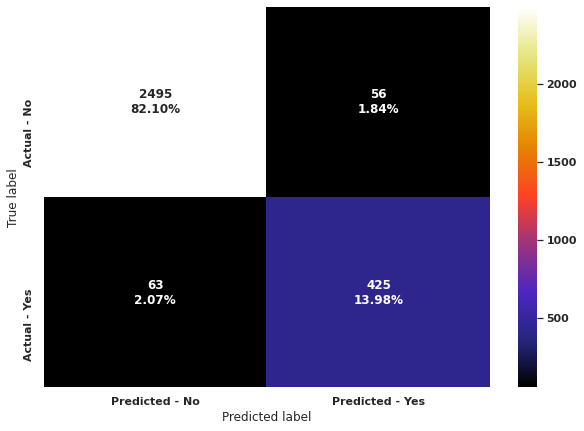

In [ ]:
# Calculating different metrics
get_metrics_score(ab)

# Creating confusion matrix
make_confusion_matrix(ab, y_test)



> ### **GRADIENT BOOST**



In [ ]:
gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Accuracy on training set :  0.9760158013544018
Accuracy on test set :  0.9641329384666009
Recall on training set :  0.8884986830553117
Recall on test set :  0.8565573770491803
Precision on training set :  0.9592417061611375
Precision on test set :  0.9146608315098468


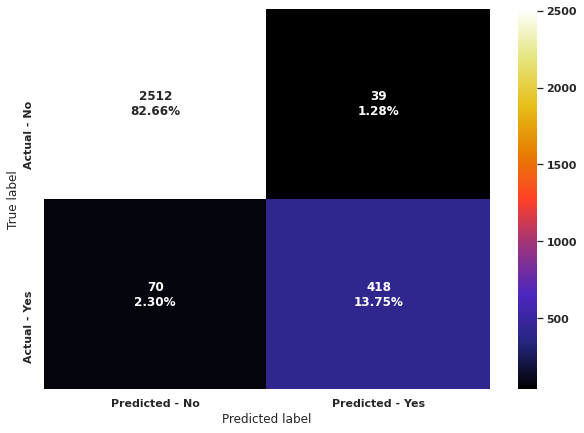

In [ ]:
# Calculating different metrics
get_metrics_score(gb)

# Creating confusion matrix
make_confusion_matrix(gb, y_test)

## **Hyperparameter tuning using GridSearch**

 ### **LOGISTIC REGRESSION - GRID SEARCH**

In [ ]:
%%time 
pipe = Pipeline([("scaler", StandardScaler()), 
                 #("poly", PolynomialFeatures(degree = 2, interaction_only=True)),
                 ("logistic_regression", LogisticRegression(random_state=1))])

param_grid = {"logistic_regression__C": [0.1, 0.4, 0.6, 1.1],
              "logistic_regression__fit_intercept": [True, False],
              "logistic_regression__solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv = grid_cv.fit(X_train, y_train)
print(
    "Original Set: Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Original Set: Best Parameters:{'logistic_regression__C': 0.4, 'logistic_regression__fit_intercept': False, 'logistic_regression__solver': 'newton-cg'} 
Score: 0.9464332637761805
CPU times: user 22.4 s, sys: 14.8 s, total: 37.2 s
Wall time: 20.3 s


In [ ]:
# Creating new pipeline with best parameters
lr_gs = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        #("poly", PolynomialFeatures(degree = 2, interaction_only=True)),
        (
            "logistic_regression",
            LogisticRegression(
                random_state=1,
                C=0.4,
                fit_intercept=False,
                solver='newton-cg',
                
            ),
        ),
    ]
)
# Fit the model on training data
lr_gs.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logistic_regression',
                 LogisticRegression(C=0.4, class_weight=None, dual=False,
                                    fit_intercept=False, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='newton-cg', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Accuracy on training set :  0.697234762979684
Accuracy on test set :  0.6854228364593616
Recall on training set :  0.9508340649692713
Recall on test set :  0.9405737704918032
Precision on training set :  0.3413173652694611
Precision on test set :  0.33116883116883117


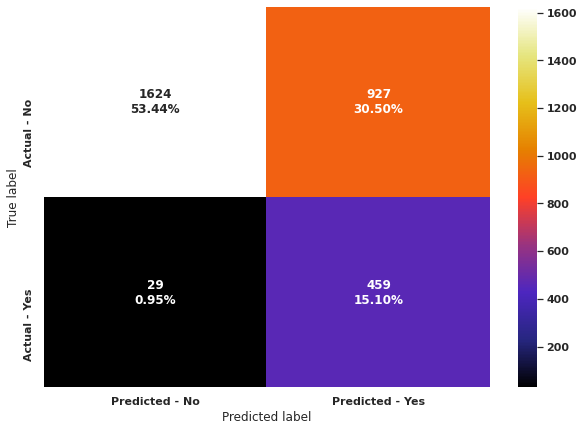

In [ ]:
# Calculating different metrics
get_metrics_score(lr_gs)

# Creating confusion matrix
make_confusion_matrix(lr_gs, y_test)

    - GridSearch took 20 seconds. 




---





>  ### **DECISION TREE - GRID SEARCH**



In [ ]:
%%time 
pipe = Pipeline([("scaler", StandardScaler()), ("decision_tree", DecisionTreeClassifier(random_state=1))])

param_grid = {"decision_tree__max_depth": [3, 6, 9, 12],
              "decision_tree__criterion": ["gini", "entropy"],
              "decision_tree__min_samples_split": [5,10,18]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
#grid_cv.fit(X_train, y_train)

#print(
 #   "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
#)
#grid_cv.fit(X_train_over, y_train_over)

#print(
  #  "\nOverSampled Set: Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
#)
grid_cv.fit(X_train_under, y_train_under)
print(
    "\nUnderSampled Set: Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 6, 'decision_tree__min_samples_split': 5} 
Score: 0.8085825797975115

OverSampled Set: Best Parameters:{'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 9, 'decision_tree__min_samples_split': 10} 
Score: 0.9472222261486596

UnderSampled Set: Best Parameters:{'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 6, 'decision_tree__min_samples_split': 10} 
Score: 0.9446750135250019
CPU times: user 23.4 s, sys: 191 ms, total: 23.6 s
Wall time: 23.5 s


In [ ]:
# Creating new pipeline with best parameters
dt_gs = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("poly", PolynomialFeatures(degree = 2, interaction_only=True)),
        (
            "decision_tree",
            DecisionTreeClassifier(
                random_state=1,
                criterion='entropy',
                max_depth=6,
                min_samples_split=10
            ),
        ),
    ]
)
# Fit the model on training data
dt_gs.fit(X_train_under, y_train_under)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=True, order='C')),
                ('decision_tree',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=6,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=10,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=1,
                                        splitter=

Accuracy on training set :  0.6433408577878104
Accuracy on test set :  0.6383678841724252
Recall on training set :  0.9806848112379281
Recall on test set :  0.9549180327868853
Precision on training set :  0.30830803201766493
Precision on test set :  0.3020090732339598


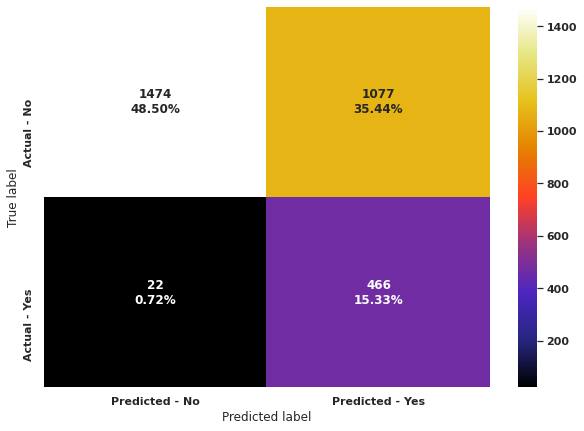

In [ ]:
# Calculating different metrics
get_metrics_score(dt_gs)

# Creating confusion matrix
make_confusion_matrix(dt_gs, y_test)

    - GridSearch took 23 seconds. 




> ### **RANDOM FOREST - GRID SEARCH**



In [ ]:
%%time
pipe = Pipeline([("scaler", StandardScaler()), ("random_forest", RandomForestClassifier(random_state=1))])

param_grid = {"random_forest__max_depth": [3,8,12],
              "random_forest__n_estimators": [100,200,300]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)
# not interested scores for Oversampled or Undersampled with this RF due to variance between Recall and Precision

Best Parameters:{'random_forest__max_depth': 12, 'random_forest__n_estimators': 200} 
Score: 0.7682046526006646
CPU times: user 59.1 s, sys: 159 ms, total: 59.3 s
Wall time: 59.2 s


In [ ]:
# Creating new pipeline with best parameters
rf_gs = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("poly", PolynomialFeatures(degree = 2, interaction_only=True)),
        (
            "random_forest",
            RandomForestClassifier(
                random_state=1,
                max_depth=12,
                n_estimators=200
            ),
        ),
    ]
)
# Fit the model on training data
rf_gs.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=True, order='C')),
                ('random_forest',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=12, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=200, n_jobs=None,
                       

Accuracy on training set :  0.994920993227991
Accuracy on test set :  0.953932214544258
Recall on training set :  0.9701492537313433
Recall on test set :  0.7868852459016393
Precision on training set :  0.998193315266486
Precision on test set :  0.9142857142857143


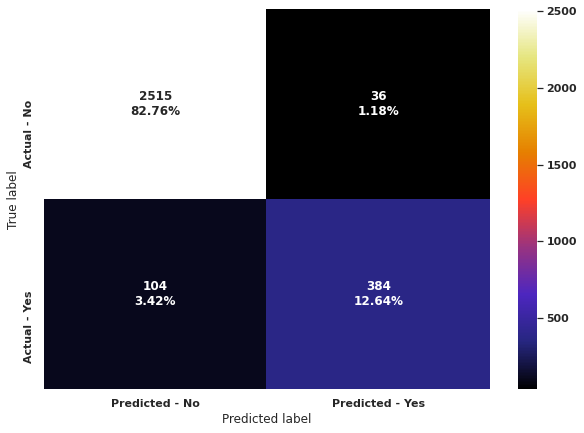

In [ ]:
# Calculating different metrics
get_metrics_score(rf_gs)

# Creating confusion matrix
make_confusion_matrix(rf_gs, y_test)

    - GridSearch took 59 seconds. 



> ### **BAGGING CLASSIFIER - GRID SEARCH**



In [ ]:
%%time
pipe = Pipeline([("scaler", StandardScaler()), ("bagging_classifier", BaggingClassifier(random_state=1))])

param_grid = {"bagging_classifier__max_samples": [0.7,0.9,1.1],
              "bagging_classifier__n_estimators": [5,10,24]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
#grid_cv.fit(X_train, y_train)

#print(
#    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
#)
#grid_cv.fit(X_train_over, y_train_over)

#print(
#    "\nOverSampled Set: Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
#)
grid_cv.fit(X_train_under, y_train_under)

print(
    "\nUnderSampled Set: Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)


UnderSampled Set: Best Parameters:{'bagging_classifier__max_samples': 0.7, 'bagging_classifier__n_estimators': 24} 
Score: 0.9657546951078135
CPU times: user 4.95 s, sys: 17 ms, total: 4.96 s
Wall time: 4.96 s


In [ ]:
# Creating new pipeline with best parameters
bc_gs = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        #("poly", PolynomialFeatures(degree = 2, interaction_only=True)),
        (
            "bagging_classifier",
            BaggingClassifier(
                random_state=1,
                max_samples=0.7,
                n_estimators=24
            ),
        ),
    ]
)
# Fit the model on training data
bc_gs.fit(X_train_under, y_train_under)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('bagging_classifier',
                 BaggingClassifier(base_estimator=None, bootstrap=True,
                                   bootstrap_features=False, max_features=1.0,
                                   max_samples=0.7, n_estimators=24,
                                   n_jobs=None, oob_score=False, random_state=1,
                                   verbose=0, warm_start=False))],
         verbose=False)

Accuracy on training set :  0.7231941309255079
Accuracy on test set :  0.7140506745640013
Recall on training set :  0.9973661106233538
Recall on test set :  0.9692622950819673
Precision on training set :  0.36704361873990304
Precision on test set :  0.35644310474755087


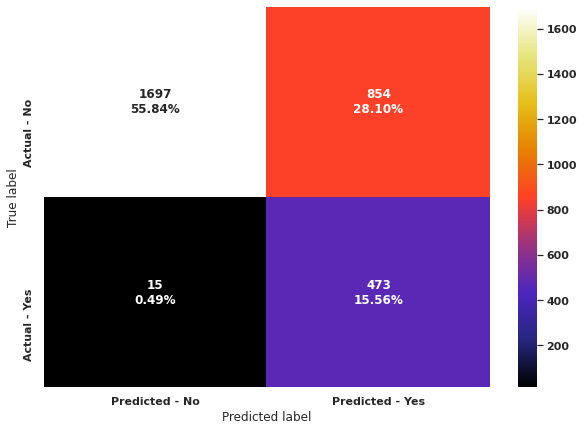

In [ ]:
# Calculating different metrics
get_metrics_score(bc_gs)

# Creating confusion matrix
make_confusion_matrix(bc_gs, y_test)

    - GridSearch took 5 seconds. 



> ### **XG BOOST - GRID SEARCH**



In [ ]:
%%time 
#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier())

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,200,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.1,0.2,0.05],
            }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=3)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)


Best Parameters:{'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__scale_pos_weight': 10} 
Score: 0.9745405730685553
CPU times: user 1min 2s, sys: 444 ms, total: 1min 3s
Wall time: 1min 2s


In [ ]:
# Creating new pipeline with best parameters
xg_gs = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        #("poly", PolynomialFeatures(degree = 2, interaction_only=False)),
        (
            "xgbclassifier",
            XGBClassifier(
                random_state=1,
                scale_pos_weight=10,
                n_estimators=50,
                learning_rate=0.05
            ),
        ),
    ]
)
# Fit the model on training data
xg_gs.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.05,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=50, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

Accuracy on training set :  0.8353555304740407
Accuracy on test set :  0.8328397499177361
Recall on training set :  0.9877085162423178
Recall on test set :  0.9692622950819673
Precision on training set :  0.4938542581211589
Precision on test set :  0.489648033126294


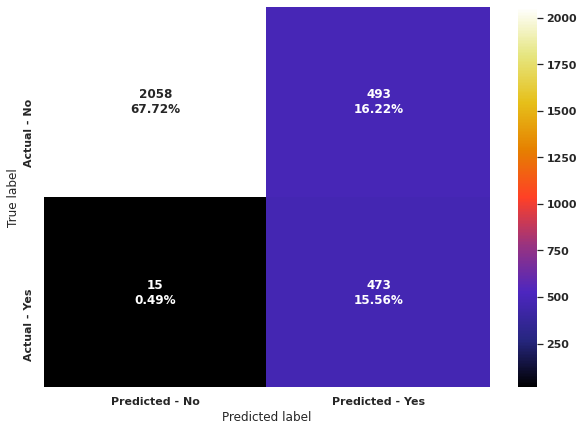

In [ ]:
# Calculating different metrics
get_metrics_score(xg_gs)

# Creating confusion matrix
make_confusion_matrix(xg_gs, y_test)

    - GridSearch took 1 minute. 



>  ### **ADA BOOST - GRID SEARCH**



In [ ]:
%%time
#Creating pipeline
pipe=make_pipeline(StandardScaler(),AdaBoostClassifier())

#Parameter grid to pass in GridSearchCV
param_grid={'adaboostclassifier__n_estimators':[50,100],
            'adaboostclassifier__learning_rate':[0.1,0.05],
            "adaboostclassifier__base_estimator": [
              DecisionTreeClassifier(max_depth=1, random_state=1),
              #DecisionTreeClassifier(max_depth=2, random_state=1),
              DecisionTreeClassifier(max_depth=3, random_state=1),
            ]
}
  

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=3)

# Fitting parameters in GridSeachCV
#grid_cv.fit(X_train, y_train)

#print(
#    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
#)
grid_cv.fit(X_train_over, y_train_over)

print(
    "\nOverSampled Set: Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)
#grid_cv = grid_cv.fit(X_train_under, y_train_under)

#print(
  #  "\nUnderSampled Set: Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
#)


OverSampled Set: Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best'), 'adaboostclassifier__learning_rate': 0.1, 'adaboostclassifier__n_estimators': 100} 
Score: 0.91880988401412
CPU times: user 56.5 s, sys: 1.27 s, total: 57.7 s
Wall time: 57.8 s


In [ ]:
# Creating new pipeline with best parameters
ab_gs = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        #("poly", PolynomialFeatures(degree = 2, interaction_only=False)),
        (
            "adaboostclassifier",
            AdaBoostClassifier(
                random_state=1,
                n_estimators=100,
                learning_rate=0.1,
                base_estimator = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
            ),
        ),
    ]
)
# Fit the model on training data
ab_gs.fit(X_train_over, y_train_over)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('adaboostclassifier',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                          class_weight=None,
                                                                          criterion='gini',
                                                                          max_depth=1,
                                                                          max_features=None,
                                                                          max_leaf_nodes=None,
                                                                          min_impurity_decrease=0.0,
                                                                          min_impurity_split=None,
                              

Accuracy on training set :  0.8985609480812641
Accuracy on test set :  0.8877920368542284
Recall on training set :  0.8683055311676909
Recall on test set :  0.8627049180327869
Precision on training set :  0.634788189987163
Precision on test set :  0.6057553956834533


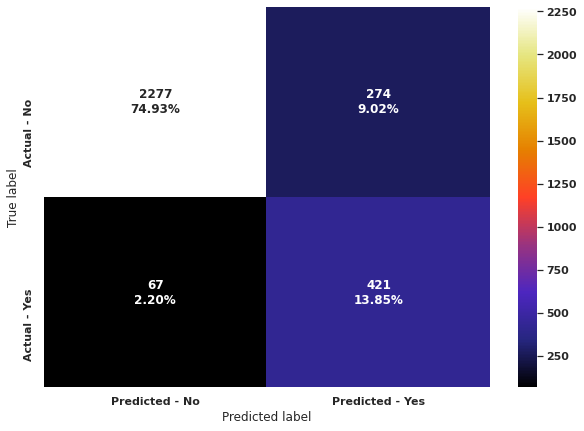

In [ ]:
# Calculating different metrics
get_metrics_score(ab_gs)

# Creating confusion matrix
make_confusion_matrix(ab_gs, y_test)

    - GridSearch took 27 seconds. 



> ### **GRADIENT BOOST - GRID SEARCH**



In [ ]:
%%time
#Creating pipeline
pipe=make_pipeline(StandardScaler(),GradientBoostingClassifier())

#Parameter grid to pass in GridSearchCV
param_grid={'gradientboostingclassifier__max_depth':[3,6],
            'gradientboostingclassifier__n_estimators':[100,150],
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=3)

# Fitting parameters in GridSeachCV
#grid_cv.fit(X_train, y_train)

#print(
#    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
#)
grid_cv.fit(X_train_over, y_train_over)

print(
    "\nOverSampled Set: Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)
#grid_cv.fit(X_train_under, y_train_under)

#print(
#    "\nUnderSampled Set: Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
#)


OverSampled Set: Best Parameters:{'gradientboostingclassifier__max_depth': 6, 'gradientboostingclassifier__n_estimators': 100} 
Score: 0.9267103714910069
CPU times: user 1min 28s, sys: 83.9 ms, total: 1min 29s
Wall time: 1min 29s


In [ ]:
# Creating new pipeline with best parameters
gb_gs = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        #("poly", PolynomialFeatures(degree = 2, interaction_only=False)),
        (
            "gradientboostingclassifier",
            GradientBoostingClassifier(
                random_state=1,
                n_estimators=100,
                max_depth=6,
            ),
        ),
    ]
)
# Fit the model on training data
gb_gs.fit(X_train_over, y_train_over)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=6, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=N

Accuracy on training set :  0.9980248306997742
Accuracy on test set :  0.9644619940769991
Recall on training set :  0.9938542581211589
Recall on test set :  0.8852459016393442
Precision on training set :  0.9938542581211589
Precision on test set :  0.8925619834710744


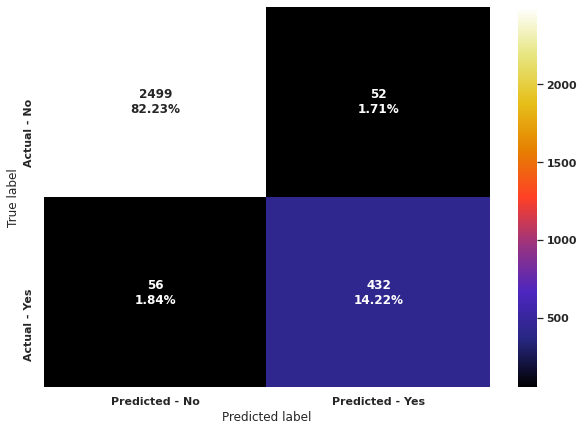

In [ ]:
# Calculating different metrics
get_metrics_score(gb_gs)

# Creating confusion matrix
make_confusion_matrix(gb_gs, y_test)

    - GridSearch took 27 seconds. 

## **Hyperparameter tuning using RandomizedSearch**



> ### **LOGISTIC REGRESSION - RANDOMIZED SEARCH**



In [ ]:
%%time 
pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=1))

param_grid = {"logisticregression__C": np.arange(0.05,1.1,0.1),
              "logisticregression__fit_intercept": [True, False],
              "logisticregression__solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
              }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, scoring=scorer, n_iter=10, cv=5, random_state=1)

# Fitting parameters
random_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
)
#random_cv.fit(X_train_over, y_train_over)

#print(
#    "\nOverSampled Set: Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
#)
#random_cv.fit(X_train_under, y_train_under)

#print(
#    "\nUnderSampled Set: Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
#)

Best Parameters:{'logisticregression__solver': 'saga', 'logisticregression__fit_intercept': False, 'logisticregression__C': 0.8500000000000002} 
Score: 0.9464332637761805
CPU times: user 5.85 s, sys: 4.06 s, total: 9.9 s
Wall time: 5.56 s


In [ ]:
# Creating new pipeline with best parameters
lr_rs = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        #("poly", PolynomialFeatures(degree = 2, interaction_only=False)),
        (
            "logisticregression",
            LogisticRegression(
                random_state=1,
                C=0.85,
                fit_intercept=False,
                solver='saga'
            ),
        ),
    ]
)
# Fit the model on training data
lr_rs.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=0.85, class_weight=None, dual=False,
                                    fit_intercept=False, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1, solver='saga',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

Accuracy on training set :  0.6968115124153499
Accuracy on test set :  0.6860809476801579
Recall on training set :  0.95171202809482
Recall on test set :  0.9405737704918032
Precision on training set :  0.3410950283196979
Precision on test set :  0.33164739884393063


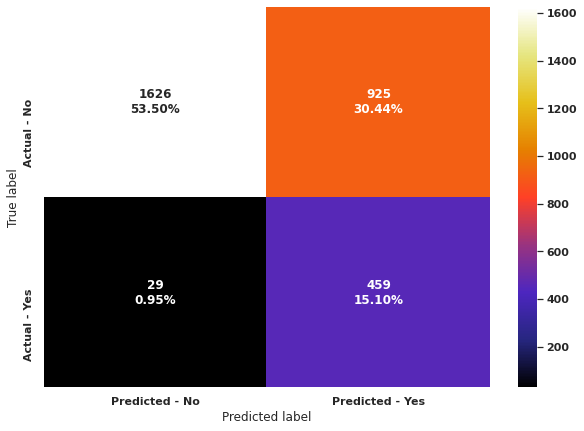

In [ ]:
# Calculating different metrics
get_metrics_score(lr_rs)

# Creating confusion matrix
make_confusion_matrix(lr_rs, y_test)

    - Randomized Search took 5 seconds. 



>  ### **DECISION TREE - RANDOMIZED SEARCH**



In [ ]:
%%time 
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

param_grid = {"decisiontreeclassifier__max_depth": np.arange(2, 14, 1),
              "decisiontreeclassifier__criterion": ["gini", "entropy"],
              "decisiontreeclassifier__min_samples_split": np.arange(3, 12, 1)
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, scoring=scorer, n_iter=20, cv=5, random_state=1)

# Fitting parameters
#random_cv.fit(X_train, y_train)

#print(
#    "Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
#)
#random_cv.fit(X_train_over, y_train_over)

#print(
#    "\nOverSampled Set: Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
#)
random_cv.fit(X_train_under, y_train_under)

print(
    "\nUnderSampled Set: Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
)


UnderSampled Set: Best Parameters:{'decisiontreeclassifier__min_samples_split': 4, 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__criterion': 'entropy'} 
Score: 0.9692673313239044
CPU times: user 2.08 s, sys: 7 ms, total: 2.08 s
Wall time: 2.09 s


In [ ]:
# Creating new pipeline with best parameters
dt_rs = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("poly", PolynomialFeatures(degree = 2, interaction_only=False)),
        (
            "decisiontreeclassifier",
            DecisionTreeClassifier(
                random_state=1,
                max_depth=4,
                criterion='entropy',
                min_samples_split=4
            ),
        ),
    ]
)
# Fit the model on training data
dt_rs.fit(X_train_under, y_train_under)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=4,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=4,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=1,
                                        splitter='best'))],
         verbose=Fal

Accuracy on training set :  0.3415632054176072
Accuracy on test set :  0.3543928923988154
Recall on training set :  0.9973661106233538
Recall on test set :  0.9897540983606558
Precision on training set :  0.19586206896551725
Precision on test set :  0.19795081967213116


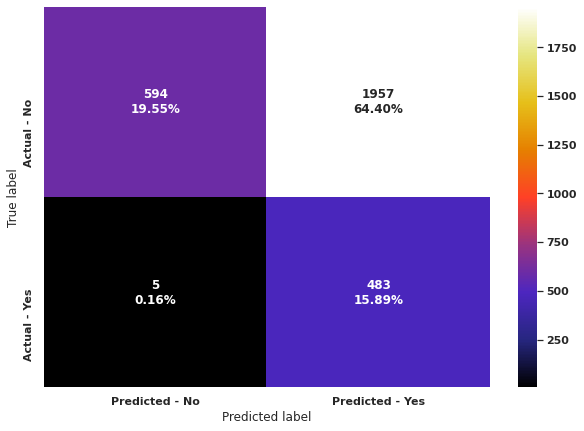

In [ ]:
# Calculating different metrics
get_metrics_score(dt_rs)

# Creating confusion matrix
make_confusion_matrix(dt_rs, y_test)

    - Randomized Search took 2 seconds. 



> ### **RANDOM FOREST - RANDOMIZED SEARCH**



In [ ]:
%%time 
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

param_grid = {"randomforestclassifier__max_depth": np.arange(1,10,1),
              "randomforestclassifier__n_estimators": np.arange(50,300,40),
              "randomforestclassifier__min_samples_split": np.arange(4,12,1)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, scoring=scorer, n_iter=10, cv=5, random_state=1)

# Fitting parameters
#random_cv.fit(X_train, y_train)

#print(
#    "Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
#)
#random_cv.fit(X_train_over, y_train_over)

#print(
#    "\nOverSampled Set: Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
#)
random_cv.fit(X_train_under, y_train_under)

print(
    "\nUnderSampled Set: Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
)


UnderSampled Set: Best Parameters:{'randomforestclassifier__n_estimators': 170, 'randomforestclassifier__min_samples_split': 7, 'randomforestclassifier__max_depth': 7} 
Score: 0.9780624468660639
CPU times: user 26.5 s, sys: 125 ms, total: 26.7 s
Wall time: 26.7 s


In [ ]:
# Creating new pipeline with best parameters
rf_rs = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        #("poly", PolynomialFeatures(degree = 2, interaction_only=False)),
        (
            "randomforestclassifier",
            RandomForestClassifier(
                random_state=1,
                max_depth=7,
                n_estimators=170,
                min_samples_split=7
            ),
        ),
    ]
)
# Fit the model on training data
rf_rs.fit(X_train_under, y_train_under)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=7, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=7,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=170, n_jobs=None,
                                        oob_score=False, random_state=1,
                                        verbose=0, warm_start=False))],
         verbose=False)

Accuracy on training set :  0.5812641083521445
Accuracy on test set :  0.5791378743007568
Recall on training set :  0.9947322212467077
Recall on test set :  0.9733606557377049
Precision on training set :  0.2766788766788767
Precision on test set :  0.27283170591614014


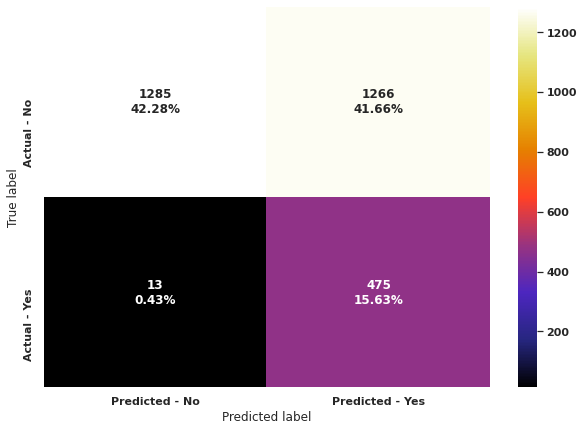

In [ ]:
# Calculating different metrics
get_metrics_score(rf_rs)

# Creating confusion matrix
make_confusion_matrix(rf_rs, y_test)

    - Randomized Search took 26 seconds. 



> ### **BAGGING CLASSIFIER - RANDOMIZED SEARCH**



In [ ]:
%%time 
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

param_grid = {"baggingclassifier__max_samples": np.arange(0.1,1,0.1),
              "baggingclassifier__n_estimators": np.arange(1,30,2)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, scoring=scorer, n_iter=10, cv=5, random_state=1)

# Fitting parameters
#random_cv.fit(X_train, y_train)

#print(
#    "Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
#)
random_cv.fit(X_train_over, y_train_over)

print(
    "\nOverSampled Set: Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
)
#random_cv.fit(X_train_under, y_train_under)

#print(
#    "\nUnderSampled Set: Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
#)


OverSampled Set: Best Parameters:{'baggingclassifier__n_estimators': 25, 'baggingclassifier__max_samples': 0.30000000000000004} 
Score: 0.956301531546176
CPU times: user 26.9 s, sys: 310 ms, total: 27.2 s
Wall time: 27.1 s


In [ ]:
# Creating new pipeline with best parameters
bg_rs = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        #("poly", PolynomialFeatures(degree = 2, interaction_only=False)),
        (
            "baggingclassifier",
            BaggingClassifier(
                random_state=1,
                max_samples=0.3,
                n_estimators=25
            ),
        ),
    ]
)

# Fit the model on training data
bg_rs.fit(X_train_over, y_train_over)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=None, bootstrap=True,
                                   bootstrap_features=False, max_features=1.0,
                                   max_samples=0.3, n_estimators=25,
                                   n_jobs=None, oob_score=False, random_state=1,
                                   verbose=0, warm_start=False))],
         verbose=False)

Accuracy on training set :  0.9778498871331829
Accuracy on test set :  0.9496544916090819
Recall on training set :  0.9666374012291484
Recall on test set :  0.8995901639344263
Precision on training set :  0.9024590163934426
Precision on test set :  0.8084714548802947


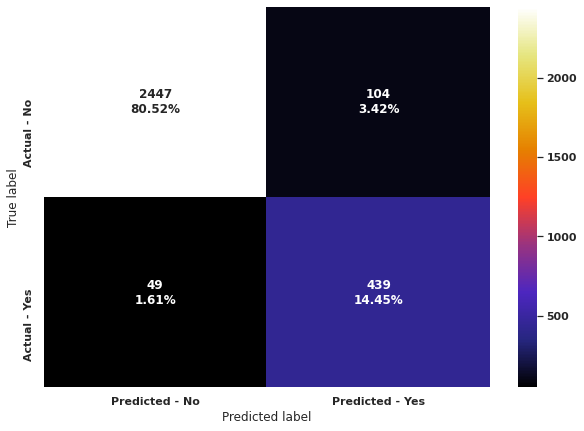

In [ ]:
# Calculating different metrics
get_metrics_score(bg_rs)

# Creating confusion matrix
make_confusion_matrix(bg_rs, y_test)

    - Randomized Search took 27 seconds. 



> ### **XG BOOST - RANDOMIZED SEARCH**



In [ ]:
%%time 
pipe = make_pipeline(StandardScaler(), XGBClassifier(random_state=1))

param_grid = {'xgbclassifier__n_estimators':np.arange(50,200,10),
              'xgbclassifier__scale_pos_weight':np.arange(0,10,1),
              'xgbclassifier__learning_rate':np.arange(0,1,0.5)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, scoring=scorer, n_iter=10, cv=5, random_state=1)

# Fitting parameters
random_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
)

Best Parameters:{'xgbclassifier__scale_pos_weight': 9, 'xgbclassifier__n_estimators': 80, 'xgbclassifier__learning_rate': 0.5} 
Score: 0.9385423912203417
CPU times: user 39 s, sys: 109 ms, total: 39.1 s
Wall time: 39 s


In [ ]:
# Creating new pipeline with best parameters
xg_rs = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        #("poly", PolynomialFeatures(degree = 5, interaction_only=False)),
        (
            "xgbclassifier",
            XGBClassifier(
                random_state=1,
                scale_pos_weight=9,
                n_estimators=80,
                learning_rate=0.5
            ),
        ),
    ]
)
# Fit the model on training data
xg_rs.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.5,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=80, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=9,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

Accuracy on training set :  0.9856094808126411
Accuracy on test set :  0.9670944389601843
Recall on training set :  1.0
Recall on test set :  0.9549180327868853
Precision on training set :  0.9178082191780822
Precision on test set :  0.8566176470588235


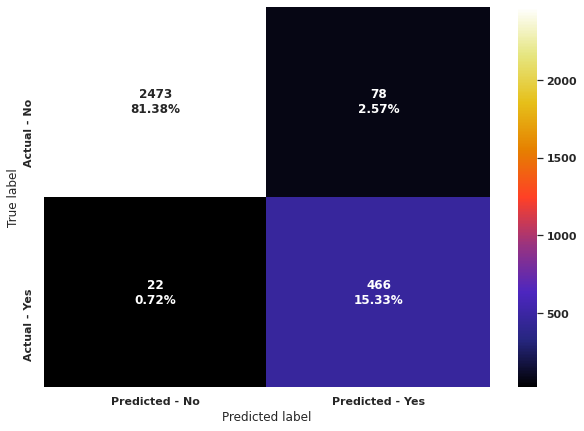

In [ ]:
# Calculating different metrics
get_metrics_score(xg_rs)

# Creating confusion matrix
make_confusion_matrix(xg_rs, y_test)

    - Randomized Search took 39 seconds. 



> ### **ADA BOOST - RANDOMIZED SEARCH**



In [ ]:
%%time 
pipe = make_pipeline(StandardScaler(),AdaBoostClassifier(random_state=1))

param_grid = {'adaboostclassifier__n_estimators':np.arange(0,48,4),
              'adaboostclassifier__learning_rate':np.arange(0,1,0.05),
              'adaboostclassifier__base_estimator': [
              DecisionTreeClassifier(max_depth=1, random_state=1),
              DecisionTreeClassifier(max_depth=2, random_state=1),
              DecisionTreeClassifier(max_depth=3, random_state=1),
            ]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, scoring=scorer, n_iter=10, cv=5, random_state=1)

# Fitting parameters
#random_cv.fit(X_train, y_train)

#print(
#    "Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
#)
random_cv.fit(X_train_over, y_train_over)

print(
    "\nOverSampled Set: Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
)
#random_cv.fit(X_train_under, y_train_under)

#print(
#    "\nUnderSampled Set: Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
#)


OverSampled Set: Best Parameters:{'adaboostclassifier__n_estimators': 4, 'adaboostclassifier__learning_rate': 0.65, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')} 
Score: 0.9213388837452559
CPU times: user 30.9 s, sys: 903 ms, total: 31.8 s
Wall time: 31.7 s


In [ ]:
# Creating new pipeline with best parameters
ab_rs = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        #("poly", PolynomialFeatures(degree = 5, interaction_only=False)),
        (
            "adaboostclassifier",
            AdaBoostClassifier(
                random_state=1,
                n_estimators=4,
                learning_rate=0.65,
                base_estimator = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best'),
            ),
        ),
    ]
)
# Fit the model on training data
ab_rs.fit(X_train_over, y_train_over)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('adaboostclassifier',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                          class_weight=None,
                                                                          criterion='gini',
                                                                          max_depth=3,
                                                                          max_features=None,
                                                                          max_leaf_nodes=None,
                                                                          min_impurity_decrease=0.0,
                                                                          min_impurity_split=None,
                              

Accuracy on training set :  0.9305869074492099
Accuracy on test set :  0.9213557091148404
Recall on training set :  0.8366988586479368
Recall on test set :  0.8217213114754098
Precision on training set :  0.7569499602859412
Precision on test set :  0.7251356238698011


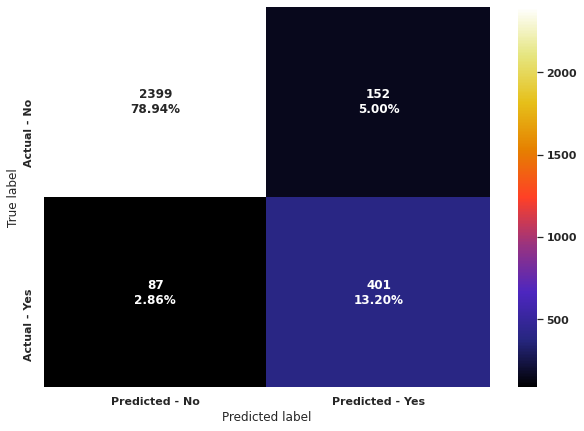

In [ ]:
# Calculating different metrics
get_metrics_score(ab_rs)

# Creating confusion matrix
make_confusion_matrix(ab_rs, y_test)

    - Randomized Search took 31 seconds. 



> ### **GRADIENT BOOST - RANDOMIZED SEARCH**



In [ ]:
%%time 
pipe = make_pipeline(StandardScaler(),GradientBoostingClassifier(random_state=1))

param_grid={'gradientboostingclassifier__max_depth':np.arange(1,10,1),
            'gradientboostingclassifier__n_estimators':np.arange(25,150,10),
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, scoring=scorer, n_iter=10, cv=5, random_state=1)

# Fitting parameters
random_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
)
#random_cv.fit(X_train_over, y_train_over)

#print(
#    "\nOverSampled Set: Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
#)
#random_cv.fit(X_train_under, y_train_under)

#print(
#    "\nUnderSampled Set: Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
#)

Best Parameters:{'gradientboostingclassifier__n_estimators': 105, 'gradientboostingclassifier__max_depth': 6} 
Score: 0.8647963521137646
CPU times: user 2min 25s, sys: 230 ms, total: 2min 25s
Wall time: 2min 25s


In [ ]:
# Creating new pipeline with best parameters
gb_rs = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "gradientboostingclassifie",
            GradientBoostingClassifier(
                random_state=1,
                n_estimators=105,
                max_depth=6,
            ),
        ),
    ]
)
# Fit the model on training data
gb_rs.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gradientboostingclassifie',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=6, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=105,
                                            n_iter_no_change=No

Accuracy on training set :  0.9994356659142212
Accuracy on test set :  0.9684106614017769
Recall on training set :  0.9964881474978051
Recall on test set :  0.8811475409836066
Precision on training set :  1.0
Precision on test set :  0.9188034188034188


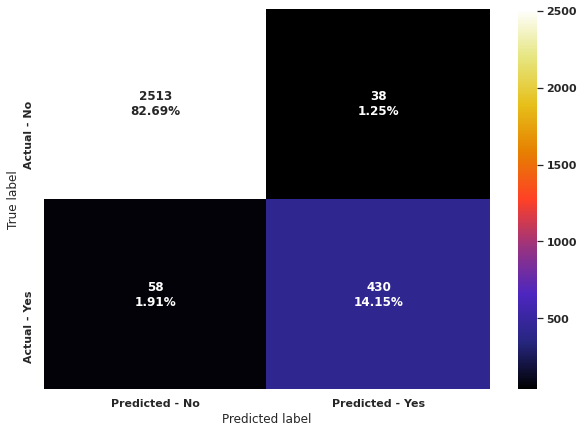

In [ ]:
# Calculating different metrics
get_metrics_score(gb_rs)

# Creating confusion matrix
make_confusion_matrix(gb_rs, y_test)

    - Randomized Search took 2 minutes. 

## **Model Performances**

In [ ]:
# defining list of models
models = [lr,lr_over,lr_under,dt,rf,bc,xg,ab,gb,dt_gs,rf_gs,bc_gs,xg_gs,ab_gs,gb_gs,dt_rs,rf_rs,bg_rs,xg_rs,ab_rs,gb_rs]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Logistic Regression",
            "Logistic Regression w/ UpSampling",
            "Logistic Regression w/ DownSampling",
            "Decision Tree",
            "Random Forest",
            "Bagging Classifier",
            "XG Boost",
            "ADA Boost",
            "Gradient Boost",
            "Decision Tree w/ GridSearch",
            "Random Forest w/ GridSearch",
            "Bagging Classifier w/ GridSearch",
            "XGBoost w/ GridSearch",
            "ADA Boost w/ GridSearch",
            "Gradient Boost w/ GridSearch",
            "Decision Tree w/ RandomSearch",
            "Random Forest w/ RandomSearch",
            "Bagging Classifier w/ RandomSearch",
            "XGBoost w/ RandomSearch",
            "ADA Boost w/ RandomSearch",
            "Gradient Boost w/ RandomSearch",
    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision
15        Decision Tree w/ RandomSearch        0.341563       0.354393      0.997366     0.989754         0.195862        0.197951
16        Random Forest w/ RandomSearch        0.581264       0.579138      0.994732     0.973361         0.276679        0.272832
11     Bagging Classifier w/ GridSearch        0.723194       0.714051      0.997366     0.969262         0.367044        0.356443
12                XGBoost w/ GridSearch        0.835356       0.832840      0.987709     0.969262         0.493854        0.489648
9           Decision Tree w/ GridSearch        0.643341       0.638368      0.980685     0.954918         0.308308        0.302009
18              XGBoost w/ RandomSearch        0.985609       0.967094      1.000000     0.954918         0.917808        0.856618
17   Bagging Classifier w/ RandomSearch        0.977850       0.949654      0.966637     0.899590         0.902459        0.808471
14         Gradient Boost w/ GridSearch        0.998025       0.964462      0.993854     0.885246         0.993854        0.892562
20       Gradient Boost w/ RandomSearch        0.999436       0.968411      0.996488     0.881148         1.000000        0.918803
7                             ADA Boost        0.963742       0.960842      0.858648     0.870902         0.910615        0.883576
2   Logistic Regression w/ DownSampling        0.799802       0.782165      0.839333     0.864754         0.436131        0.414538
13              ADA Boost w/ GridSearch        0.898561       0.887792      0.868306     0.862705         0.634788        0.605755
8                        Gradient Boost        0.976016       0.964133      0.888499     0.856557         0.959242        0.914661
6                              XG Boost        0.974605       0.959855      0.877085     0.846311         0.961501        0.897826
19            ADA Boost w/ RandomSearch        0.930587       0.921356      0.836699     0.821721         0.756950        0.725136
1     Logistic Regression w/ UpSampling        0.798815       0.795327      0.820018     0.821721         0.433411        0.428419
3                         Decision Tree        1.000000       0.942744      1.000000     0.819672         1.000000        0.823045
5                    Bagging Classifier        0.996614       0.953932      0.981563     0.799180         0.997324        0.902778
4                         Random Forest        1.000000       0.954261      1.000000     0.793033         1.000000        0.910588
10          Random Forest w/ GridSearch        0.994921       0.953932      0.970149     0.786885         0.998193        0.914286
0                   Logistic Regression        0.876834       0.869036      0.433714     0.422131         0.684211        0.639752

#### Which Metic is more important? 
* Predicting that a customer will NOT leave credit card services BUT the customer does leave i.e. losing on a potential source of income for the company because that customer will not be targeted by the customer support team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Thera Bank wants `Recall` to be maximized, greater the Recall, the lesser the chances of false negatives.

The Model Performace Table above is sorted by Recall descending. The first 5 rows in the table have very high test recall (over 95%). This is achieved at the cost of Accuracy and Precision. Very few cases of attrition will be missed by these models. However, many False Positives will be generated. This may not be a problem since there are many low cost ways of reaching out to customers at risk of attrition. As long as cost of resources for reaching the False Positives is low, use one of the top 5 models.

If more balance needs to be maintained, the 6th (XGBoost w/ RandomSearch) thru the 10th (ADA Boost) models on the list provide reasonable Test Recall (over 85%). There may be some examples of minor overfitting in this group.

The remaing models on the list are not recommended. There are various problems with the models on the low end of the list. These may contain significant overfitting or an imbalance of Recall vs Precision with a Recall score that isn't worth the imbalance. 

On the issue of overfitting, I know that to solve this, I need to increase Bias and reduce Variance. However, I'm still discovering which parameters are most effective in doing this. More practice is needed.

GridSearch and Randomized Search can be a exhaustive process in regards to time and computational resources. I kept search time reasonably low by limiting the parameter grid and keeping cv=5 in most cases. This may have a negative impact on model scoring.



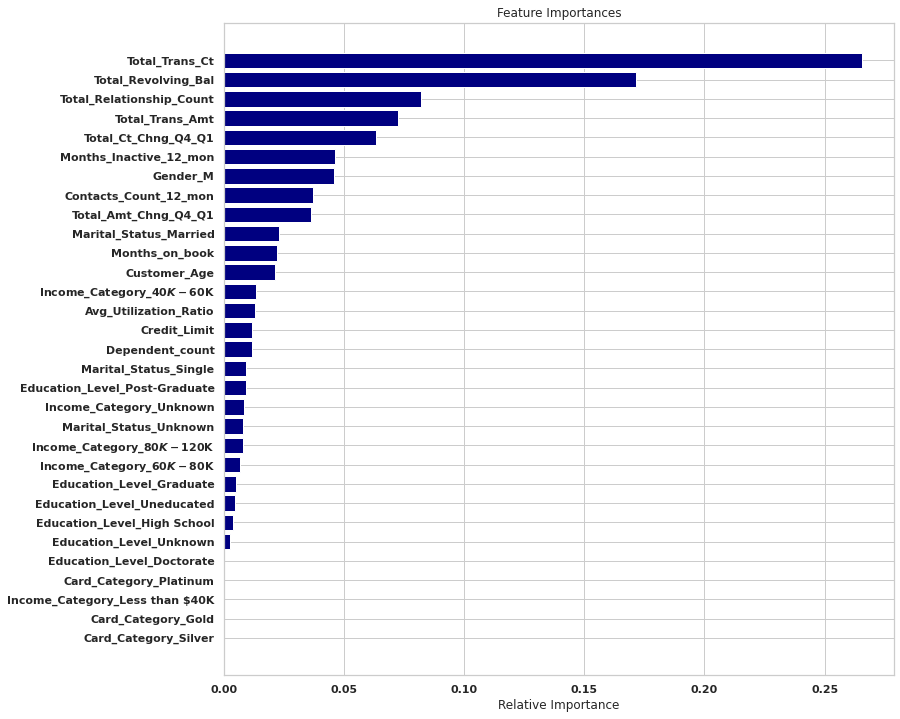

In [ ]:
feature_names = X_train.columns
importances = xg_rs[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="navy", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()
print()


## **Business Recommendations**

  - As 'No. of Contacts in the last 12 months' increases, so does Attrition. Increase customer service capacity. Deploy extra resources to examine the nature and reason for the contact. Put extra focus on the customers with multiple contacts
  - Platinum Card: Reduce Annual Fees. Examine customer contacts for Platinum Card holders
  - Focus on servicing the customers with 2 or more dependents as Attrition is high for this group.
  - Focus on servicing the customers with Doctorate or Post-Graduate education as Attrition is high for this group.
  - Focus on the customers with 40 to 50 transactions in the last 12 months as Total_Trans_Ct ranks high on feature importances
  - Focus on the customers with Total Transaction Amounts in the 2,000 USD to 3,000 USD range in the last 12 months. Attrition is high in this range.



---



---



---



---

